In [1]:
import sys
sys.path.append('/eos/user/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from Levs import Levs
from Ldate import Ldate
from LyAdata24 import read_df, read_df
from Ldate import Ldate
from tqdm import tqdm
from time import time
from math import comb
lydf = read_df()
maxvol = 0.2906665578484535

In [2]:
bins = 200
ranges = np.linspace(0.005, maxvol, bins+1)
gaussian = lambda x, sig, mu: 1/((2*np.pi)**0.5 * sig) * np.exp(-1/2 * (x-mu)**2/sig**2)

In [3]:
a = lydf[[True if 458 <= val <= 481 else False for val in lydf['run']]]
b = lydf[[True if 487 <= val <= 512 else False for val in lydf['run']]]

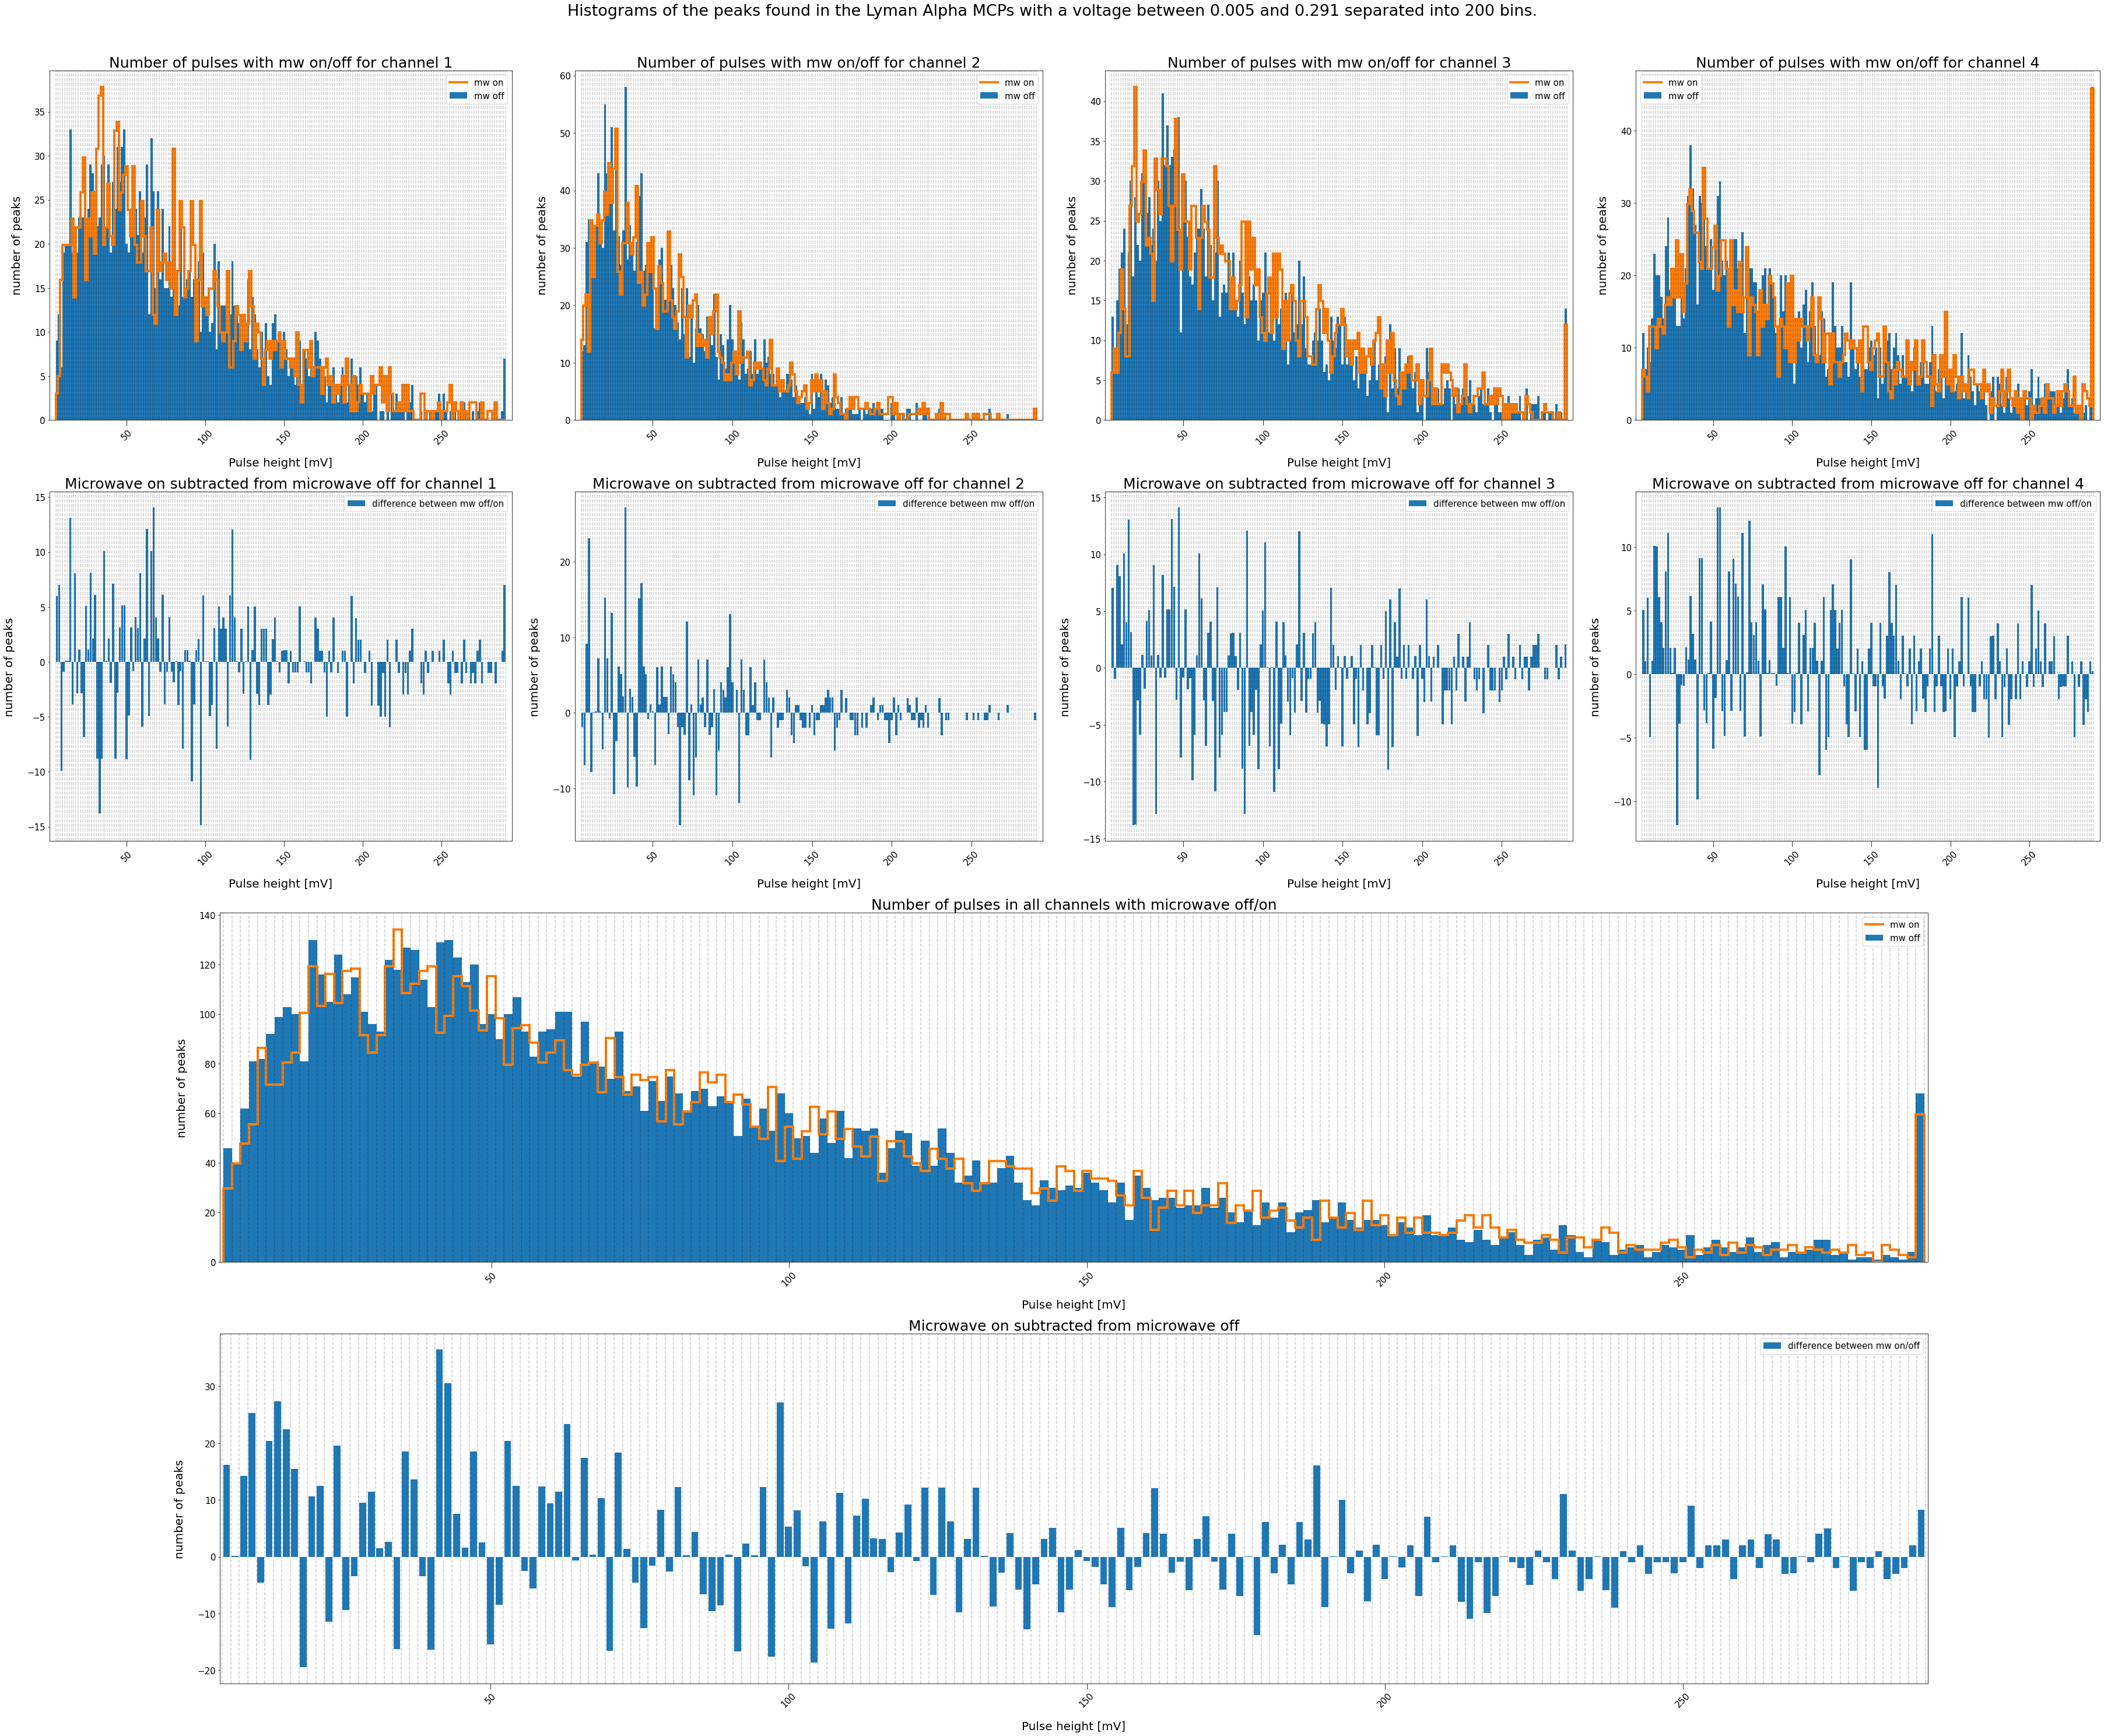

In [4]:
ra = Levs(a).volt_hist_sort2(bins, norm = 'elena')

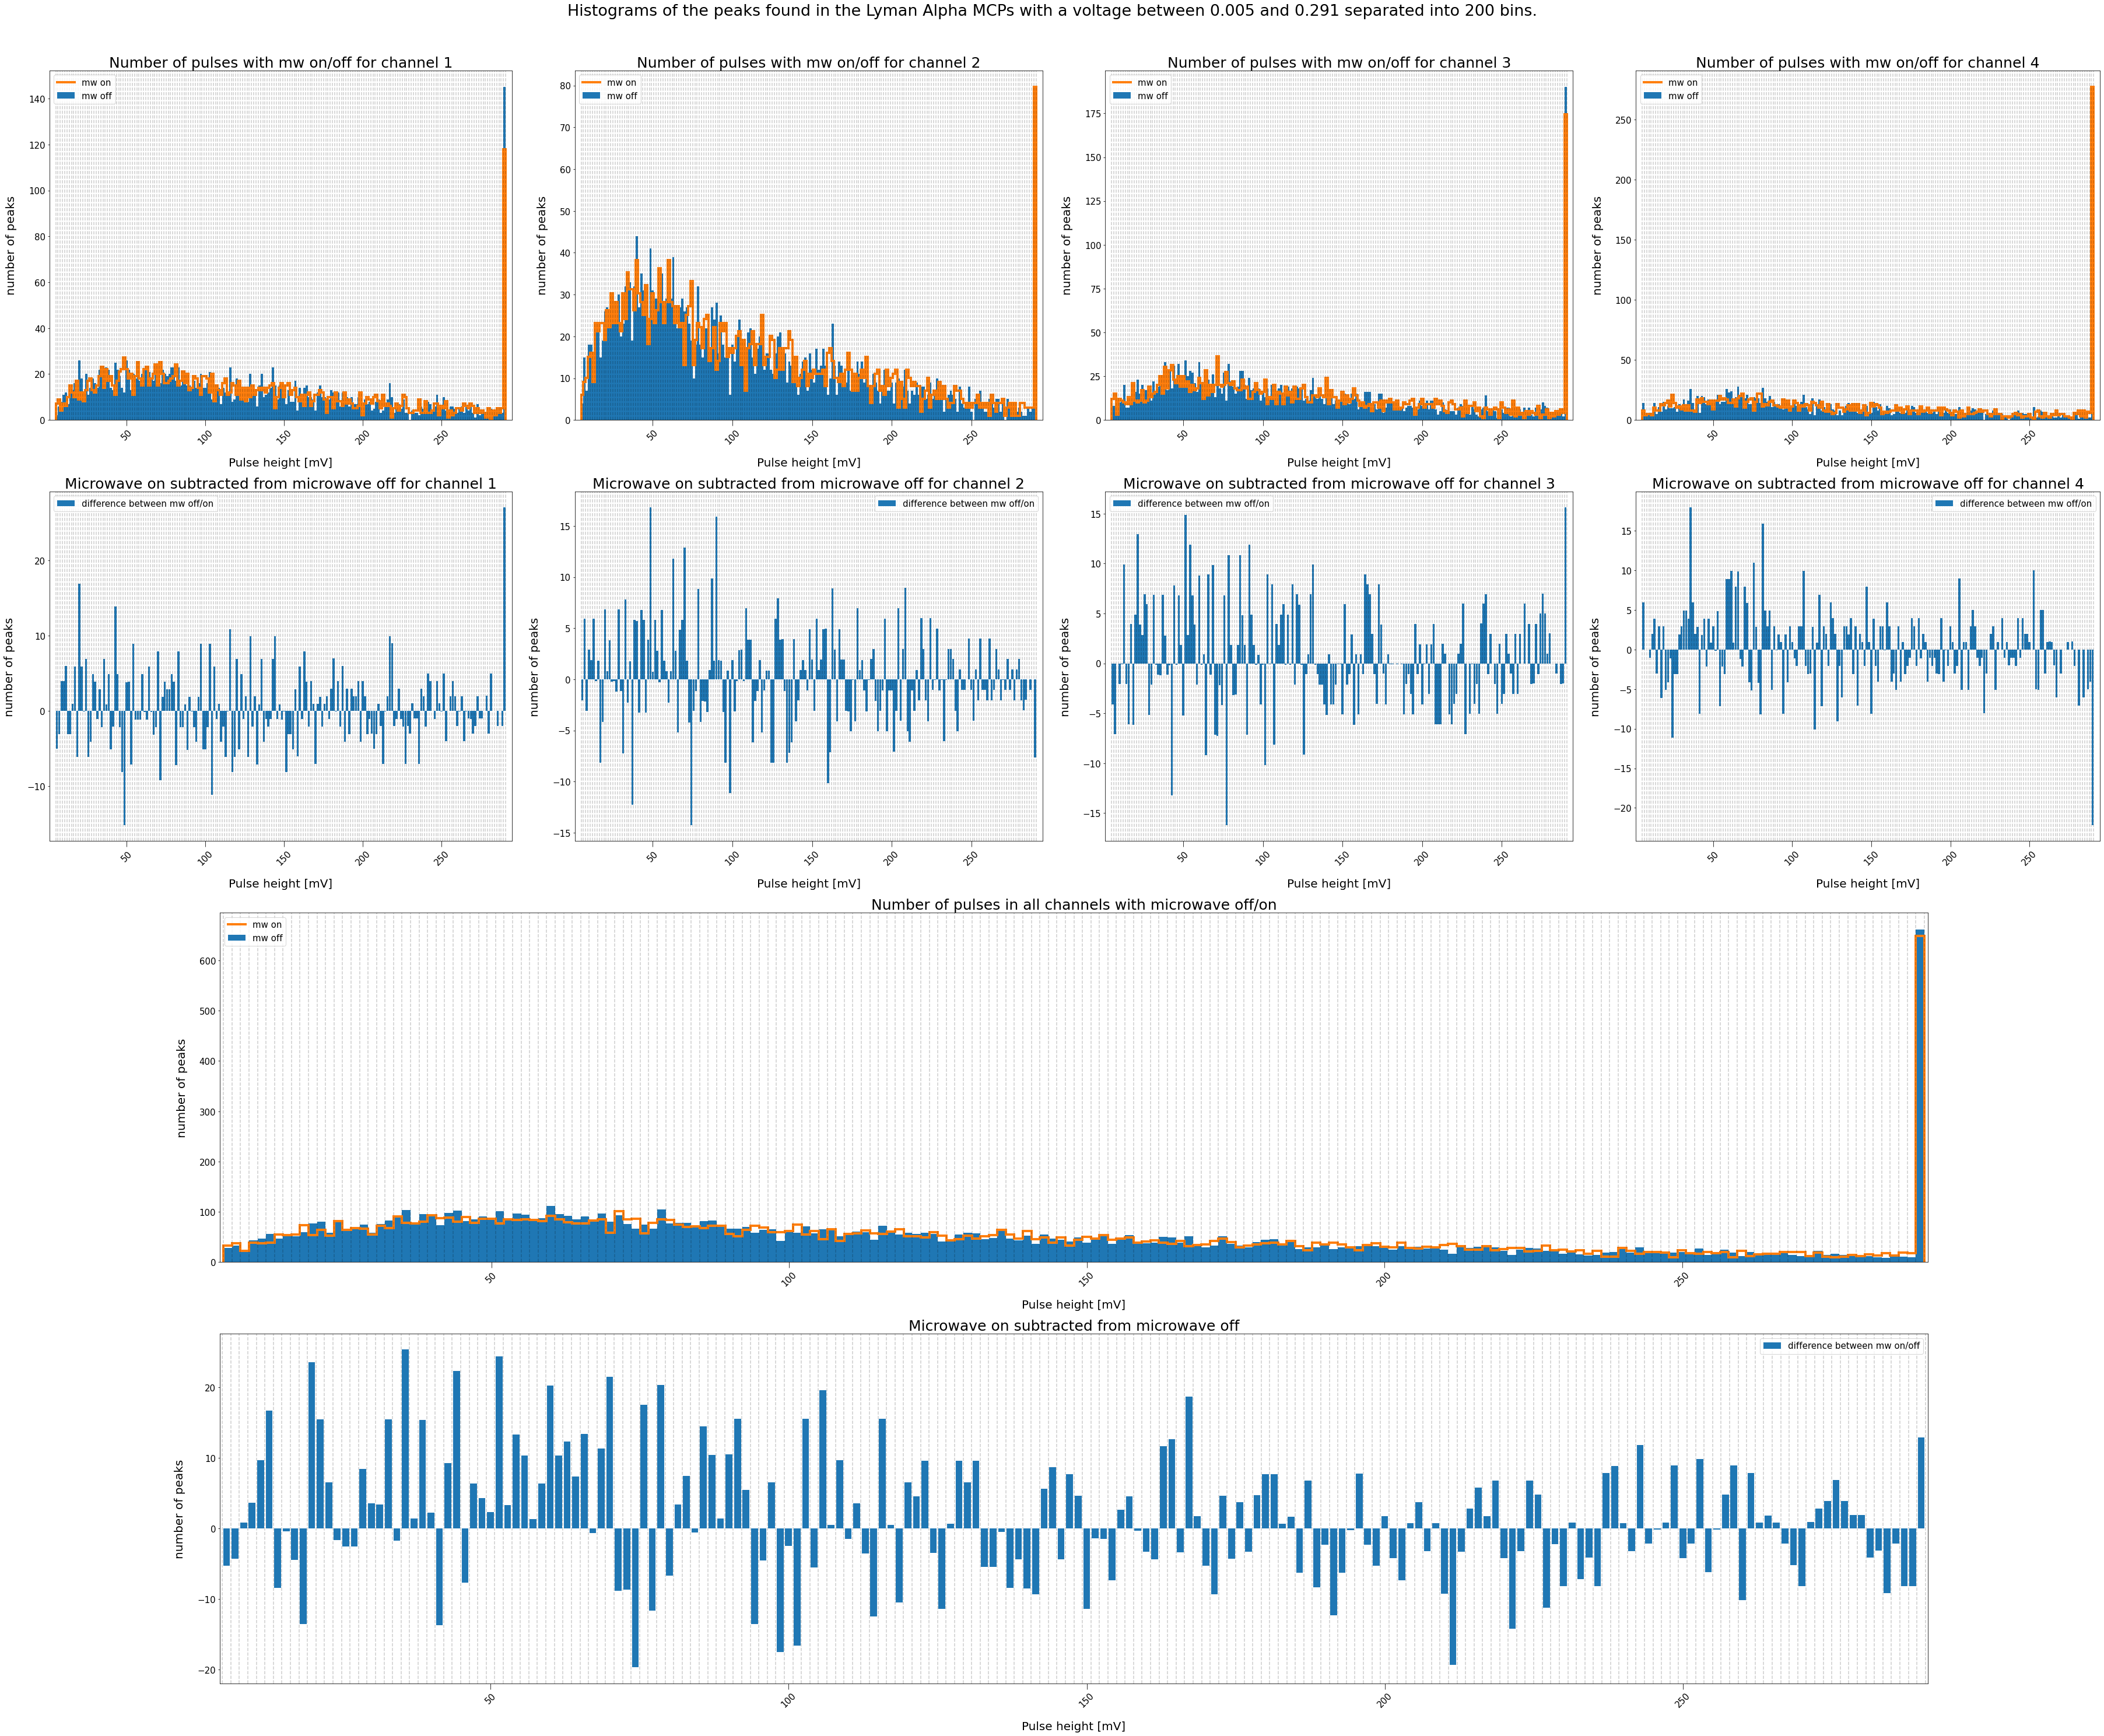

In [5]:
rb = Levs(b).volt_hist_sort2(bins, norm = 'elena')

In [6]:
#number of pulses with all 4 channels added for each peak
rat = [[val+bal+kal+nal for val,bal,kal,nal in zip(ra[0][0],ra[0][1],ra[0][2],ra[0][3])],[val+bal+kal+nal for val,bal,kal,nal in zip(ra[1][0],ra[1][1],ra[1][2],ra[1][3])]]
rbt = [[val+bal+kal+nal for val,bal,kal,nal in zip(rb[0][0],rb[0][1],rb[0][2],rb[0][3])],[val+bal+kal+nal for val,bal,kal,nal in zip(rb[1][0],rb[1][1],rb[1][2],rb[1][3])]]

#difference between mw on/off number of pulses
rad = [[val-bal for val,bal in zip(tal,nal)] for tal,nal in zip(ra[0],ra[1])]
rbd = [[val-bal for val,bal in zip(tal,nal)] for tal,nal in zip(rb[0],rb[1])]

#difference between mw on/off number of pulses with all 4 channels added
radt = [val+bal+kal+nal for val,bal,kal,nal in zip(rad[0],rad[1],rad[2],rad[3])]
rbdt = [val+bal+kal+nal for val,bal,kal,nal in zip(rbd[0],rbd[1],rbd[2],rbd[3])]

In [7]:
#sepearate dataframes for mw on/off
aoff = a[a.microwave == 'off']
aon = a[a.microwave == 'on']

boff = b[b.microwave == 'off']
bon = b[b.microwave == 'on']

In [8]:
#total NE50 line intensity in million particles for mw on/off
aeoff = sum(aoff.NE50_I)
aeon = sum(aon.NE50_I)

beoff = sum(boff.NE50_I)
beon = sum(bon.NE50_I)

In [9]:
#runs with mw on/off
aroff = sorted(list(set(aoff.run)))
aron = sorted(list(set(aon.run)))

broff = sorted(list(set(boff.run)))
bron = sorted(list(set(bon.run)))

In [10]:
#get for each mw off run the probability for each bin and channel to have a pulse per 1000000 particles in the NE50 line
apoff = np.zeros((len(aroff),4,bins))
bpoff = np.zeros((len(broff),4,bins))

#get for each mw on run the probability for each bin and channel to have a pulse per 1000000 particles in the NE50 line
apon = np.zeros((len(aron),4,bins))
bpon = np.zeros((len(bron),4,bins))

#put the elena intensity in here
areoff = np.zeros(len(aroff))
breoff = np.zeros(len(broff))
areon = np.zeros(len(aron))
breon = np.zeros(len(bron))

In [11]:
#calculate apoff
for i in range(len(aroff)):
    temp_off = aoff[aoff.run == aroff[i]]
    temp_eoff = sum(list(temp_off.NE50_I))
    areoff[i] = temp_eoff
    
    temp_toff = [[val for bal in list(temp_off.time_ch1) for val in bal if bal != 'None'],[val for bal in list(temp_off.time_ch2) for val in bal if bal != 'None'],[val for bal in list(temp_off.time_ch3) for val in bal if bal != 'None'],[val for bal in list(temp_off.time_ch4) for val in bal if bal != 'None']]
    temp_hoff = [[val for bal in list(temp_off.height_ch1) for val in bal if bal != 'None'],[val for bal in list(temp_off.height_ch2) for val in bal if bal != 'None'],[val for bal in list(temp_off.height_ch3) for val in bal if bal != 'None'],[val for bal in list(temp_off.height_ch4) for val in bal if bal != 'None']]
    
    temp_resoff = np.array([np.histogram(temp_hoff[0],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hoff[1],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hoff[2],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hoff[3],range=[0.005,maxvol],bins=bins)[0]])
    
    apoff[i] = temp_resoff/temp_eoff
    
#calculate apon
for i in range(len(aron)):
    temp_on = aon[aon.run == aron[i]]
    temp_eon = sum(list(temp_on.NE50_I))
    areon[i] = temp_eon
    
    temp_ton = [[val for bal in list(temp_on.time_ch1) for val in bal if bal != 'None'],[val for bal in list(temp_on.time_ch2) for val in bal if bal != 'None'],[val for bal in list(temp_on.time_ch3) for val in bal if bal != 'None'],[val for bal in list(temp_on.time_ch4) for val in bal if bal != 'None']]
    temp_hon = [[val for bal in list(temp_on.height_ch1) for val in bal if bal != 'None'],[val for bal in list(temp_on.height_ch2) for val in bal if bal != 'None'],[val for bal in list(temp_on.height_ch3) for val in bal if bal != 'None'],[val for bal in list(temp_on.height_ch4) for val in bal if bal != 'None']]
    
    temp_reson = np.array([np.histogram(temp_hon[0],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hon[1],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hon[2],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hon[3],range=[0.005,maxvol],bins=bins)[0]])
    
    apon[i] = temp_reson/temp_eon

#calculate bpoff
for i in range(len(broff)):
    temp_off = boff[boff.run == broff[i]]
    temp_eoff = sum(list(temp_off.NE50_I))
    breoff[i] = temp_eoff
    
    temp_toff = [[val for bal in list(temp_off.time_ch1) for val in bal if bal != 'None'],[val for bal in list(temp_off.time_ch2) for val in bal if bal != 'None'],[val for bal in list(temp_off.time_ch3) for val in bal if bal != 'None'],[val for bal in list(temp_off.time_ch4) for val in bal if bal != 'None']]
    temp_hoff = [[val for bal in list(temp_off.height_ch1) for val in bal if bal != 'None'],[val for bal in list(temp_off.height_ch2) for val in bal if bal != 'None'],[val for bal in list(temp_off.height_ch3) for val in bal if bal != 'None'],[val for bal in list(temp_off.height_ch4) for val in bal if bal != 'None']]
    
    temp_resoff = np.array([np.histogram(temp_hoff[0],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hoff[1],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hoff[2],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hoff[3],range=[0.005,maxvol],bins=bins)[0]])
    
    bpoff[i] = temp_resoff/temp_eoff
    
#calculate bpon
for i in range(len(bron)):
    temp_on = bon[bon.run == bron[i]]
    temp_eon = sum(list(temp_on.NE50_I))
    breon[i] = temp_eon
    
    temp_ton = [[val for bal in list(temp_on.time_ch1) for val in bal if bal != 'None'],[val for bal in list(temp_on.time_ch2) for val in bal if bal != 'None'],[val for bal in list(temp_on.time_ch3) for val in bal if bal != 'None'],[val for bal in list(temp_on.time_ch4) for val in bal if bal != 'None']]
    temp_hon = [[val for bal in list(temp_on.height_ch1) for val in bal if bal != 'None'],[val for bal in list(temp_on.height_ch2) for val in bal if bal != 'None'],[val for bal in list(temp_on.height_ch3) for val in bal if bal != 'None'],[val for bal in list(temp_on.height_ch4) for val in bal if bal != 'None']]
    
    temp_reson = np.array([np.histogram(temp_hon[0],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hon[1],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hon[2],range=[0.005,maxvol],bins=bins)[0], np.histogram(temp_hon[3],range=[0.005,maxvol],bins=bins)[0]])
    
    bpon[i] = temp_reson/temp_eon

In [12]:
#get the weighed mean probability and standard deviation over all runs for each bin from apoff (weighed with areoff values)
afpoff = np.zeros((4, bins))
afpstdoff = np.zeros((4, bins))

#get the weighed mean probability and standard deviation over all runs for each bin from apon (weighed with areoff values)
afpon = np.zeros((4, bins))
afpstdon = np.zeros((4, bins))

#get the weighed mean probability and standard deviation over all runs for each bin from bpoff (weighed with breoff values)
bfpoff = np.zeros((4, bins))
bfpstdoff = np.zeros((4, bins))

#get the weighed mean probability and standard deviation over all runs for each bin from bpoff (weighed with breoff values)
bfpon = np.zeros((4, bins))
bfpstdon = np.zeros((4, bins))

In [13]:
#calculate afpoff and afpstdoff
for i in range(4):
    for k in range(bins):
        afpoff[i][k] = sum([bal/aeoff * val[i][k] for val,bal in zip(apoff,areoff)])
        afpstdoff[i][k] = sum([bal/aeoff * (val[i][k]-afpoff[i][k])**2 for val,bal in zip(apoff,areoff)])**0.5
        
#calculate afpon and afpstdon
for i in range(4):
    for k in range(bins):
        afpon[i][k] = sum([bal/aeon * val[i][k] for val,bal in zip(apon,areon)])
        afpstdon[i][k] = sum([bal/aeon * (val[i][k]-afpon[i][k])**2 for val,bal in zip(apon,areon)])**0.5

#calculate bfpoff and bfpstdoff
for i in range(4):
    for k in range(bins):
        bfpoff[i][k] = sum([bal/beoff * val[i][k] for val,bal in zip(bpoff,breoff)])
        bfpstdoff[i][k] = sum([bal/beoff * (val[i][k]-bfpoff[i][k])**2 for val,bal in zip(bpoff,breoff)])**0.5
        
#calculate bfpon and bfpstdon
for i in range(4):
    for k in range(bins):
        bfpon[i][k] = sum([bal/beon * val[i][k] for val,bal in zip(bpon,breon)])
        bfpstdon[i][k] = sum([bal/beon * (val[i][k]-bfpon[i][k])**2 for val,bal in zip(bpon,breon)])**0.5

In [14]:
#get the difference between elements in afpoff and afpon
ad = np.zeros((4,bins))

#get the difference between elements in bfpoff and bfpon
bd = np.zeros((4,bins))

In [15]:
#calculate ad
for i in range(4):
    for k in range(bins):
        ad[i][k] = (afpon[i][k]-afpoff[i][k])

#calculate bd
for i in range(4):
    for k in range(bins):
        bd[i][k] = (bfpon[i][k]-bfpoff[i][k])

In [16]:
#look how many standard deviations (taken from from afpstdoff) the values in afpon are from their counterpart in afpoff
az = np.zeros((4,bins))

#look how many standard deviations (taken from from bfpstdoff) the values in bfpon are from their counterpart in bfpoff
bz = np.zeros((4,bins))

In [17]:
#calculate az
for i in range(4):
    for k in range(bins):
        if afpoff[i][k] != 0:
            az[i][k] = (afpon[i][k]-afpoff[i][k])/afpstdoff[i][k]
        else:
            az[i][k] = 0 #afpon[i][k]

#calculate bz
for i in range(4):
    for k in range(bins):
        if bfpoff[i][k] != 0:
            bz[i][k] = (bfpon[i][k]-bfpoff[i][k])/bfpstdoff[i][k]
        else:
            bz[i][k] = 0 #bfpon[i][k]

In [18]:
#calculate t score for values in afpoff and afpon
at = np.zeros((4,bins))

#calculate t score for values in bfpoff and bfpon
bt = np.zeros((4,bins))

In [19]:
#calculate at
for i in range(4):
    for k in range(bins):
        if afpoff[i][k] != 0:
            at[i][k] = (afpon[i][k]-afpoff[i][k])/(afpstdoff[i][k]/len(aron)**0.5)
        else:
            at[i][k] = 0 #afpon[i][k]

#calculate bt
for i in range(4):
    for k in range(bins):
        if bfpoff[i][k] != 0:
            bt[i][k] = (bfpon[i][k]-bfpoff[i][k])/(bfpstdoff[i][k]/len(bron)**0.5)
        else:
            bt[i][k] = 0 #bfpon[i][k]

In [20]:
#repeat all this stuff but now add the peaks for all 4 channels together

#get for each mw off run the probability for each bin to have a pulse per 1000000 particles in the NE50 line with combined channels
apofft = np.zeros((len(aroff),bins))
bpofft = np.zeros((len(broff),bins))

#get for each mw on run the probability for each bin to have a pulse per 1000000 particles in the NE50 line with combined channels
apont = np.zeros((len(aron),bins))
bpont = np.zeros((len(bron),bins))

#put the elena intensity in here
areoff = np.zeros(len(aroff))
breoff = np.zeros(len(broff))
areon = np.zeros(len(aron))
breon = np.zeros(len(bron))

#calculate apofft
for i in range(len(aroff)):
    temp_off = aoff[aoff.run == aroff[i]]
    temp_eoff = sum(list(temp_off.NE50_I))
    areoff[i] = temp_eoff

    temp_toff = [val for bal in temp_off.time_ch1 for val in bal if bal != 'None']+[val for bal in temp_off.time_ch2 for val in bal if bal != 'None']+[val for bal in temp_off.time_ch3 for val in bal if bal != 'None']+[val for bal in temp_off.time_ch4 for val in bal if bal != 'None']
    temp_hoff = [val for bal in temp_off.height_ch1 for val in bal if bal != 'None']+[val for bal in temp_off.height_ch2 for val in bal if bal != 'None']+[val for bal in temp_off.height_ch3 for val in bal if bal != 'None']+[val for bal in temp_off.height_ch4 for val in bal if bal != 'None']
    
    temp_resoff = np.histogram(temp_hoff,range=[0.005,maxvol],bins=bins)[0]
    
    apofft[i] = temp_resoff/temp_eoff
    
#calculate apont
for i in range(len(aron)):
    temp_on = aon[aon.run == aron[i]]
    temp_eon = sum(list(temp_on.NE50_I))
    areon[i] = temp_eon

    temp_ton = [val for bal in temp_on.time_ch1 for val in bal if bal != 'None']+[val for bal in temp_on.time_ch2 for val in bal if bal != 'None']+[val for bal in temp_on.time_ch3 for val in bal if bal != 'None']+[val for bal in temp_on.time_ch4 for val in bal if bal != 'None']
    temp_hon = [val for bal in temp_on.height_ch1 for val in bal if bal != 'None']+[val for bal in temp_on.height_ch2 for val in bal if bal != 'None']+[val for bal in temp_on.height_ch3 for val in bal if bal != 'None']+[val for bal in temp_on.height_ch4 for val in bal if bal != 'None']
    
    temp_reson = np.histogram(temp_hon,range=[0.005,maxvol],bins=bins)[0]
    
    apont[i] = temp_reson/temp_eon
    
#calculate bpofft
for i in range(len(broff)):
    temp_off = boff[boff.run == broff[i]]
    temp_eoff = sum(list(temp_off.NE50_I))
    breoff[i] = temp_eoff

    temp_toff = [val for bal in temp_off.time_ch1 for val in bal if bal != 'None']+[val for bal in temp_off.time_ch2 for val in bal if bal != 'None']+[val for bal in temp_off.time_ch3 for val in bal if bal != 'None']+[val for bal in temp_off.time_ch4 for val in bal if bal != 'None']
    temp_hoff = [val for bal in temp_off.height_ch1 for val in bal if bal != 'None']+[val for bal in temp_off.height_ch2 for val in bal if bal != 'None']+[val for bal in temp_off.height_ch3 for val in bal if bal != 'None']+[val for bal in temp_off.height_ch4 for val in bal if bal != 'None']
    
    temp_resoff = np.histogram(temp_hoff,range=[0.005,maxvol],bins=bins)[0]
    
    bpofft[i] = temp_resoff/temp_eoff
    
#calculate bpont
for i in range(len(bron)):
    temp_on = bon[bon.run == bron[i]]
    temp_eon = sum(list(temp_on.NE50_I))
    breon[i] = temp_eon

    temp_ton = [val for bal in temp_on.time_ch1 for val in bal if bal != 'None']+[val for bal in temp_on.time_ch2 for val in bal if bal != 'None']+[val for bal in temp_on.time_ch3 for val in bal if bal != 'None']+[val for bal in temp_on.time_ch4 for val in bal if bal != 'None']
    temp_hon = [val for bal in temp_on.height_ch1 for val in bal if bal != 'None']+[val for bal in temp_on.height_ch2 for val in bal if bal != 'None']+[val for bal in temp_on.height_ch3 for val in bal if bal != 'None']+[val for bal in temp_on.height_ch4 for val in bal if bal != 'None']
    
    temp_reson = np.histogram(temp_hon,range=[0.005,maxvol],bins=bins)[0]
    
    bpont[i] = temp_reson/temp_eon

In [21]:
#get the weighed mean probability and standard deviation over all runs for each bin from apofft (weighed with areoff values) combined over all channels
afpofft = np.zeros(bins)
afpstdofft = np.zeros(bins)

#get the weighed mean probability and standard deviation over all runs for each bin from apont (weighed with areoff values) combined over all channels
afpont = np.zeros(bins)
afpstdont = np.zeros(bins)

#get the weighed mean probability and standard deviation over all runs for each bin from bpofft (weighed with breoff values) combined over all channels
bfpofft = np.zeros(bins)
bfpstdofft = np.zeros(bins)

#get the weighed mean probability and standard deviation over all runs for each bin from bpofft (weighed with breoff values) combined over all channels
bfpont = np.zeros(bins)
bfpstdont = np.zeros(bins)

#calculate afpofft and afpstdofft
for k in range(bins):
    afpofft[k] = sum([bal/aeoff * val[k] for val,bal in zip(apofft,areoff)])
    afpstdofft[k] = sum([bal/aeoff * (val[k]-afpofft[k])**2 for val,bal in zip(apofft,areoff)])**0.5
    
#calculate afpont and afpstdont
for k in range(bins):
    afpont[k] = sum([bal/aeoff * val[k] for val,bal in zip(apont,areon)])
    afpstdont[k] = sum([bal/aeon * (val[k]-afpont[k])**2 for val,bal in zip(apont,areon)])**0.5
    
#calculate bfpofft and bfpstdofft
for k in range(bins):
    bfpofft[k] = sum([bal/beoff * val[k] for val,bal in zip(bpofft,breoff)])
    bfpstdofft[k] = sum([bal/beoff * (val[k]-bfpofft[k])**2 for val,bal in zip(bpofft,breoff)])**0.5
    
#calculate bfpont and bfpstdont
for k in range(bins):
    bfpont[k] = sum([bal/beoff * val[k] for val,bal in zip(bpont,breon)])
    bfpstdont[k] = sum([bal/beon * (val[k]-bfpont[k])**2 for val,bal in zip(bpont,breon)])**0.5

In [22]:
#look how many standard deviations (taken from from afpstdofft) the values in afpont are from their counterpart in afpofft
azt = np.zeros(bins)

#look how many standard deviations (taken from from bfpstdofft) the values in bfpont are from their counterpart in bfpofft
bzt = np.zeros(bins)

#calculate aerrt
for k in range(bins):
    if afpofft[k] != 0:
        azt[k] = (afpont[k]-afpofft[k])/afpstdofft[k]
    else:
        azt[k] = 0 #afpon[i][k]
        
#calculate berrt
for k in range(bins):
    if bfpofft[k] != 0:
        bzt[k] = (bfpont[k]-bfpofft[k])/bfpstdofft[k]
    else:
        bzt[k] = 0 #afpon[i][k]

In [23]:
#calculate t score for values in afpofft and afpont
att = np.zeros(bins)

#calculate t score for values in bfpofft and bfpont
btt = np.zeros(bins)

#calculate att
for k in range(bins):
    if afpofft[k] != 0:
        att[k] = (afpont[k]-afpofft[k])/(afpstdofft[k]/len(aron)**0.5)
    else:
        att[k] = 0 #afpon[i][k]

#calculate btt
for k in range(bins):
    if bfpofft[k] != 0:
        btt[k] = (bfpont[k]-bfpofft[k])/(bfpstdofft[k]/len(bron)**0.5)
    else:
        btt[k] = 0 #bfpon[i][k]

In [24]:
#get the difference between elements in afpofft and afpont
adt = np.zeros(bins)

#get the difference between elements in bfpofft and bfpont
bdt = np.zeros(bins)

#calculate ad
for k in range(bins):
    adt[k] = (afpont[k]-afpofft[k])

#calculate bd
for k in range(bins):
    bdt[k] = (bfpont[k]-bfpofft[k])

In [25]:
#do not use mc_norm, it takes way longer and does the same thing
def mc_bin(p, n):
    res = np.zeros(len(p))
    
    for i in range(len(res)):
        res[i] = np.random.binomial(n, p[i], 1)
            
    return res

def mc_norm(p, s, n):
    res = np.zeros(len(p))
    
    #for i in range(res.shape[0]):
    #    res[i] = np.random.normal(p[i]*n, s[i]*n)
    
    for k in range(n):
        for i in range(len(res)):
            temp_prob = max(np.random.normal(p[i], s[i]),0)
            res[i] += sum(np.random.choice([0,1], size=100, p=[1-temp_prob,temp_prob]))
            
    return res

In [26]:
aaoff = np.zeros((4,bins))
aaon = np.zeros((4,bins))

for i in range(4):
    aaoff[i] = mc_bin(afpoff[i], aeoff)
    aaon[i] = mc_bin(afpon[i], aeoff)

In [27]:
baoff = np.zeros((4,bins))
baon = np.zeros((4,bins))

for i in range(4):
    baoff[i] = mc_bin(bfpoff[i], beoff)
    baon[i] = mc_bin(bfpon[i], beoff)

In [28]:
aaofft = np.zeros(bins)
aaont = np.zeros(bins)

aaofft = mc_bin(afpofft, aeoff)
aaont = mc_bin(afpont, aeoff)

In [29]:
baofft = np.zeros(bins)
baont = np.zeros(bins)

baofft = mc_bin(bfpofft, beoff)
baont = mc_bin(bfpont, beoff)

In [893]:
for i in range(10):
    print(sum(boffl[i]), sum(bonl[i]))
    
print(sum(rbt[0]), sum(rbt[1]).round(0))

10138.0 9862.0
10274.0 9705.0
10179.0 9894.0
10258.0 9747.0
10112.0 9818.0
10103.0 9719.0
10115.0 9776.0
10207.0 9644.0
10191.0 10004.0
10143.0 9707.0
10172 9882.0


In [30]:
filenum = 20

boffl = np.zeros((filenum,bins))
bonl = np.zeros((filenum,bins))

for i in range(filenum):
    boffl[i] = mc_bin(bfpofft, beoff)
    bonl[i] = mc_bin(bfpont, beoff)

In [49]:
step = 20

bdl = np.zeros((filenum,bins-step))
bdpl = np.zeros((filenum,bins-step))

for i in range(filenum):
    for k in range(bins-step):
        bdl[i][k] = sum([(val-bal) for val,bal in zip(boffl[i][k:k+step],bonl[i][k:k+step])])
        bdpl[i][k] = sum([(val+bal) for val,bal in zip(boffl[i][k:k+step],bonl[i][k:k+step])])
    #bdl[i] = [val/bal for val,bal in zip(bdl[i],bdpl[i])]
        
bdlt = [np.average(val) for val in np.transpose(bdl)]

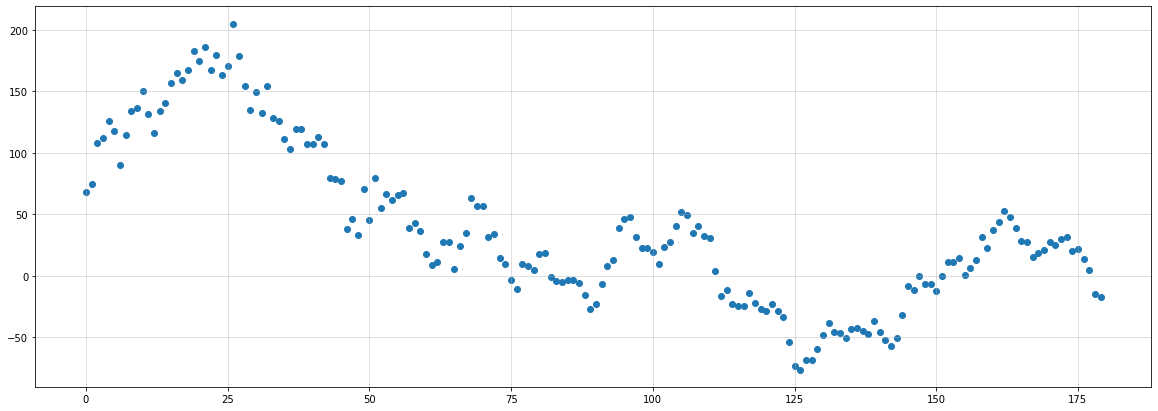

In [50]:
plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)
xl = list(range(0,bins-step,1))

plt.scatter(xl, bdlt)

#for i in range(filenum):
#    plt.plot(xl, bdl[i])

In [35]:
for i in range(filenum):
    print(int(sum(boffl[i][3:15])), int(sum(bonl[i][3:15])), ((sum(boffl[i][3:15])-sum(bonl[i][3:15]))/(sum(boffl[i][3:15])+sum(bonl[i][3:15]))).round(3), int((sum(boffl[i][3:15])-sum(bonl[i][3:15])).round(0)))

print(sum(rbt[0][3:15]), int(sum(rbt[1][3:15]).round(0)), ((sum(rbt[0][3:15])-sum(rbt[1][3:15]))/(sum(rbt[0][3:15])+sum(rbt[1][3:15]))).round(3), int((sum(rbt[0][3:15])-sum(rbt[1][3:15])).round(0)))

686 654 0.024 32
773 629 0.103 144
695 699 -0.003 -4
710 588 0.094 122
701 649 0.039 52
699 698 0.001 1
717 638 0.058 79
702 661 0.03 41
689 687 0.001 2
746 664 0.058 82
686 691 -0.004 -5
722 657 0.047 65
717 717 0.0 0
731 650 0.059 81
694 653 0.03 41
705 661 0.032 44
729 642 0.063 87
717 657 0.044 60
711 657 0.039 54
738 688 0.035 50
716 671 0.032 45


In [938]:
sum([val-bal for val,bal in zip(rbt[0][-10:],rbt[1][-10:])])/sum([val+bal for val,bal in zip(rbt[0][-10:],rbt[1][-10:])])

0.004499534202364955

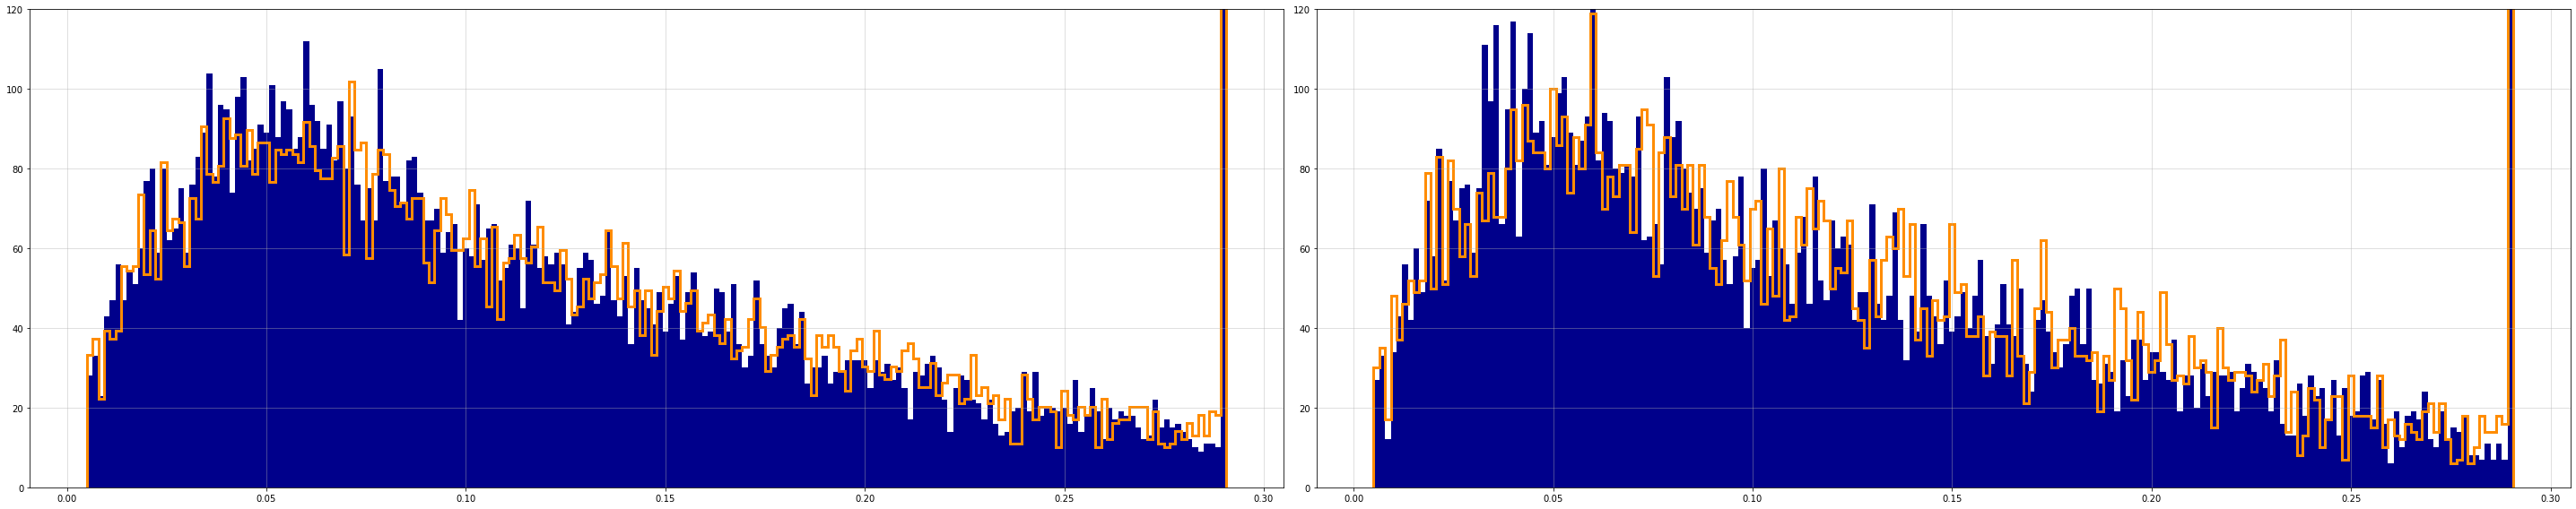

In [53]:
fig = plt.figure(layout = 'tight', figsize = (40,8))
gs = GridSpec(1, 2, figure = fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax1.grid(alpha = 0.5)
ax2.grid(alpha = 0.5)
ax1.set_ylim(0,120)
ax2.set_ylim(0,120)

ax1.stairs(rbt[0], edges = ranges, fill = True, color = 'darkblue')
ax1.stairs(rbt[1], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

ax2.stairs(boffl[2], edges = ranges, fill = True, color = 'darkblue')
ax2.stairs(bonl[2], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

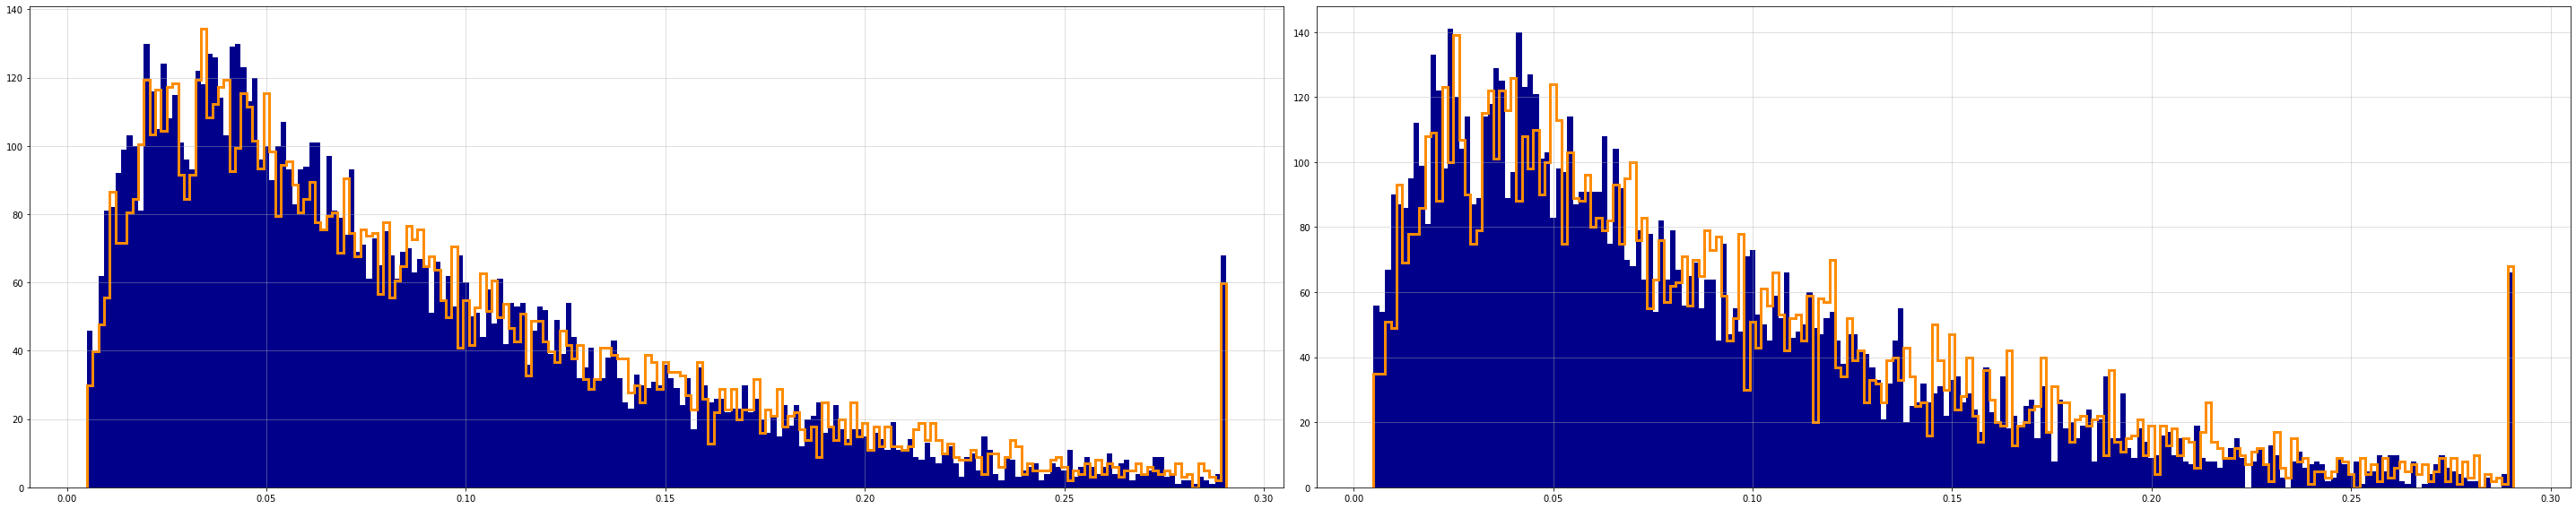

In [54]:
fig = plt.figure(layout = 'tight', figsize = (40,8))
gs = GridSpec(1, 2, figure = fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax1.grid(alpha = 0.5)
ax2.grid(alpha = 0.5)

ax1.stairs(rat[0], edges = ranges, fill = True, color = 'darkblue')
ax1.stairs(rat[1], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

ax2.stairs(aaofft, edges = ranges, fill = True, color = 'darkblue')
ax2.stairs(aaont, edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

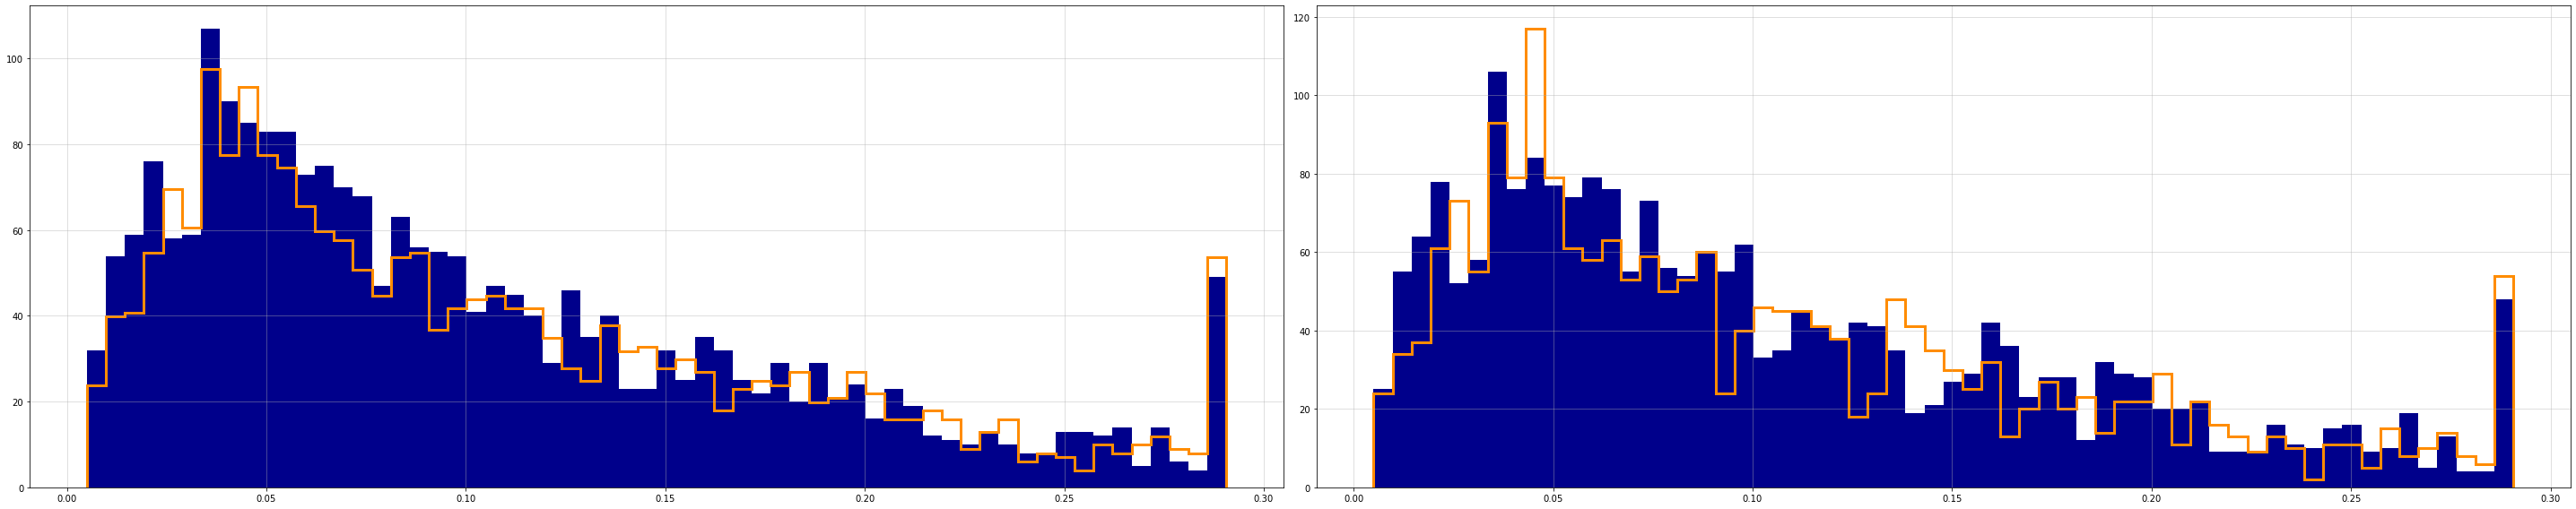

In [881]:
ch = 3

fig = plt.figure(layout = 'tight', figsize = (40,8))
gs = GridSpec(1, 2, figure = fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax1.grid(alpha = 0.5)
ax2.grid(alpha = 0.5)

ax1.stairs(ra[0][ch], edges = ranges, fill = True, color = 'darkblue')
ax1.stairs(ra[1][ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

ax2.stairs(aaoff[ch], edges = ranges, fill = True, color = 'darkblue')
ax2.stairs(aaon[ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

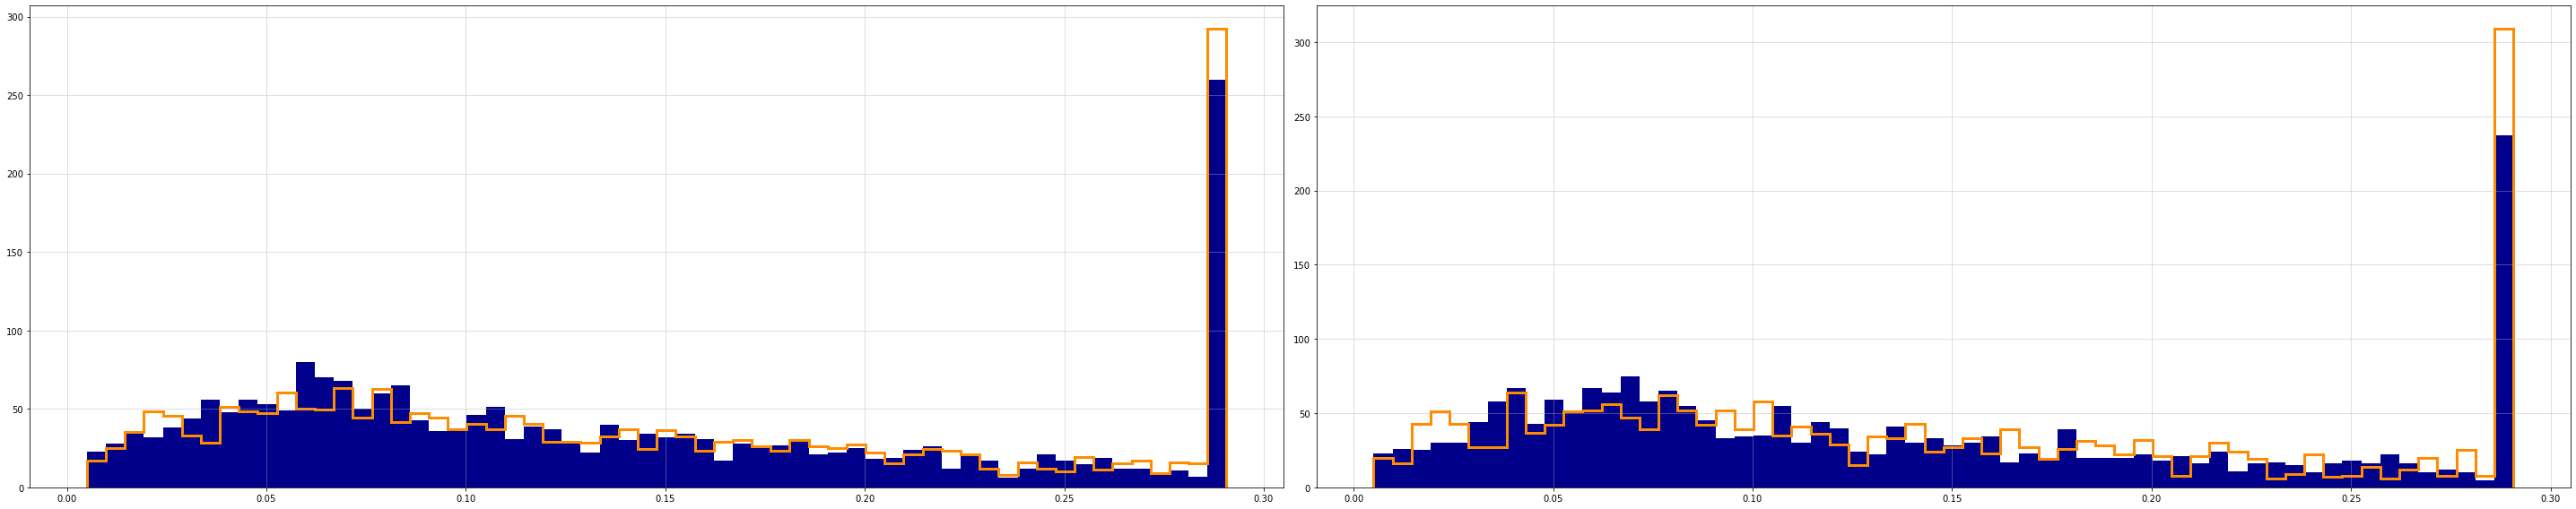

In [703]:
ch = 3

fig = plt.figure(layout = 'tight', figsize = (40,8))
gs = GridSpec(1, 2, figure = fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax1.grid(alpha = 0.5)
ax2.grid(alpha = 0.5)

ax1.stairs(rb[0][ch], edges = ranges, fill = True, color = 'darkblue')
ax1.stairs(rb[1][ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

ax2.stairs(baoff[ch], edges = ranges, fill = True, color = 'darkblue')
ax2.stairs(baon[ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

In [870]:
num = 100000
tb = np.zeros(num)
tn = np.zeros(num)
p = [afpoff[0][3]]
s = [afpstdoff[0][3]]
xl = list(range(0,150,1))

for i in tqdm(range(num)):
    tb[i] = mc_bin(p, 10000)
    tn[i] = mc_norm(p, s, 100)
    
yb = [len([1 for bal in tb if val<=bal<val+1]) for val in xl]
yn = [len([1 for bal in tn if val<=bal<val+1]) for val in xl]

100%|██████████| 100000/100000 [08:46<00:00, 189.82it/s]


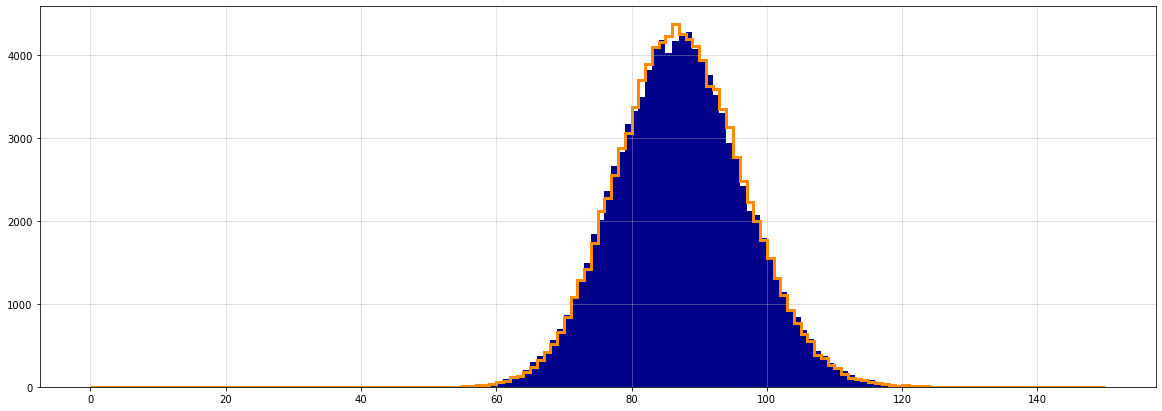

In [871]:
plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.stairs(yn, xl+[150], fill = True, color = 'darkblue')
plt.stairs(yb, xl+[150], fill = False, color = 'darkorange', linewidth = 3)

In [862]:
np.random.choice([0, 1], p = [0.7,0.3])

1

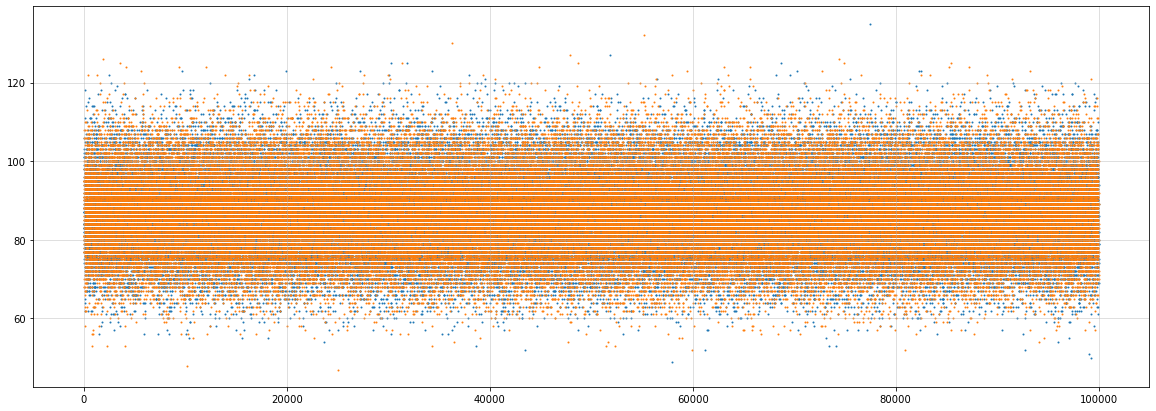

In [880]:
plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)
xl = np.linspace(0,num-1,num)

plt.scatter(xl, tb, s=1)
plt.scatter(xl, tn, s=1)

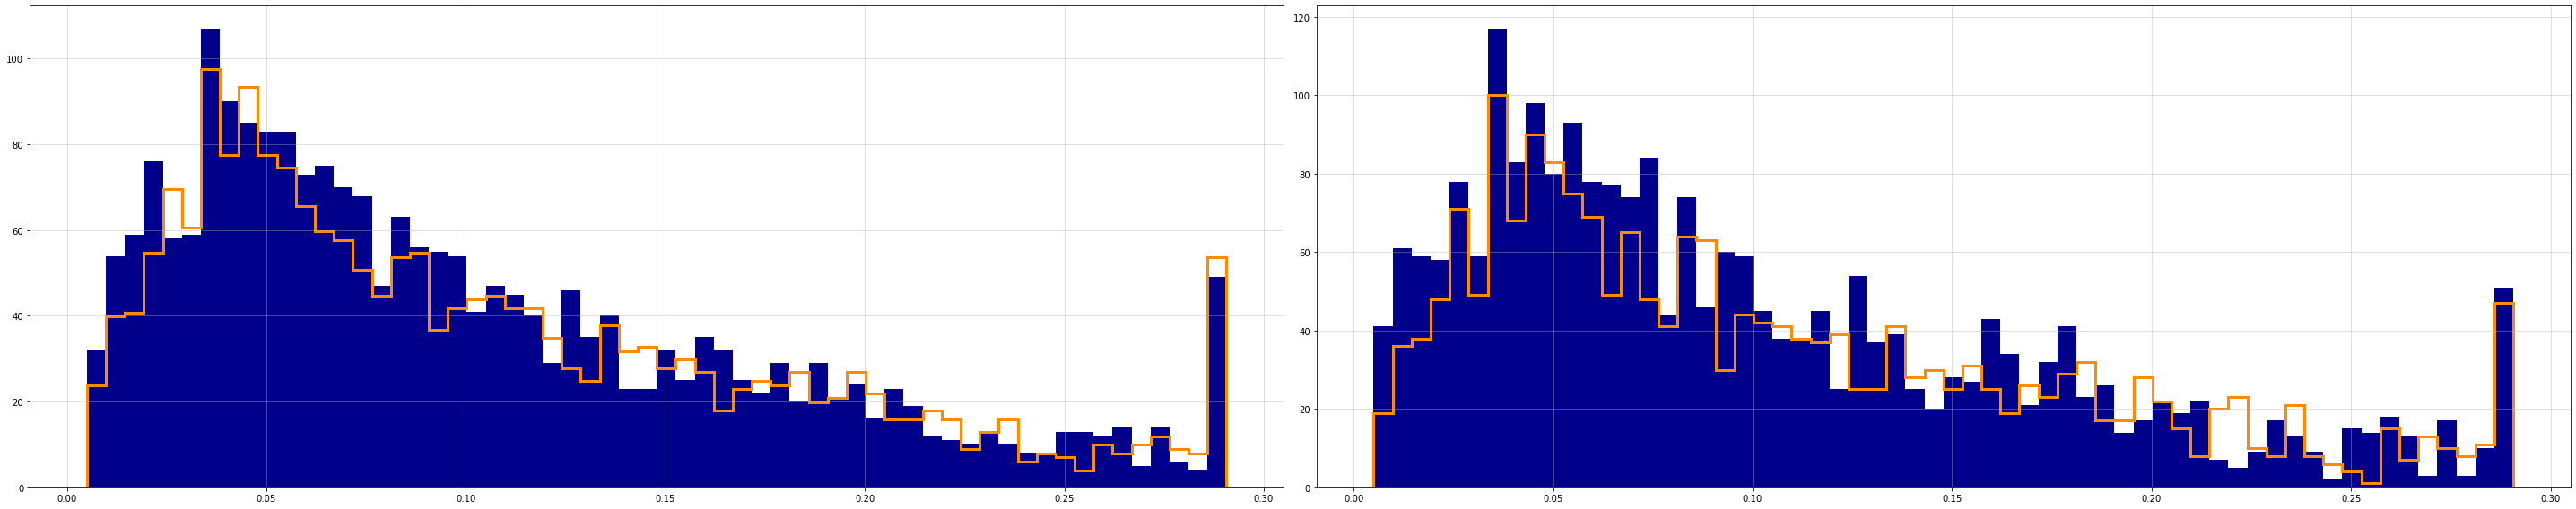

In [687]:
ch = 3

fig = plt.figure(layout = 'tight', figsize = (40,8))
gs = GridSpec(1, 2, figure = fig)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax1.grid(alpha = 0.5)
ax2.grid(alpha = 0.5)

ax1.stairs(ra[0][ch], edges = ranges, fill = True, color = 'darkblue')
ax1.stairs(ra[1][ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

ax2.stairs(aofftstb[ch], edges = ranges, fill = True, color = 'darkblue')
ax2.stairs(aontstb[ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

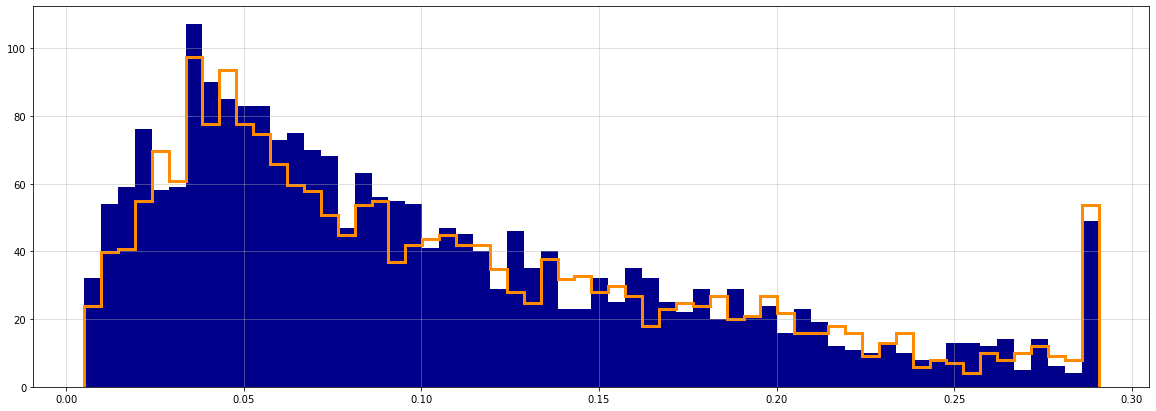

In [659]:
ch = 3

plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.stairs(ra[0][ch], edges = ranges, fill = True, color = 'darkblue')
plt.stairs(ra[1][ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

In [680]:
aofftst = np.zeros((4,bins))
aontst = np.zeros((4,bins))

for i in range(4):
    aofftst[i] = mc_norm(afpoff[i]*10000, afpstdoff[i]*10000, 1)
    aontst[i] = mc_norm(afpon[i]*10000, afpstdon[i]*10000, 1)

In [311]:
bofftst = np.zeros((4,bins))
bontst = np.zeros((4,bins))

for i in range(4):
    bofftst[i] = mc(bfpoff[i], bfpstdoff[i], 100)
    bontst[i] = mc(bfpon[i], bfpstdon[i], 100)

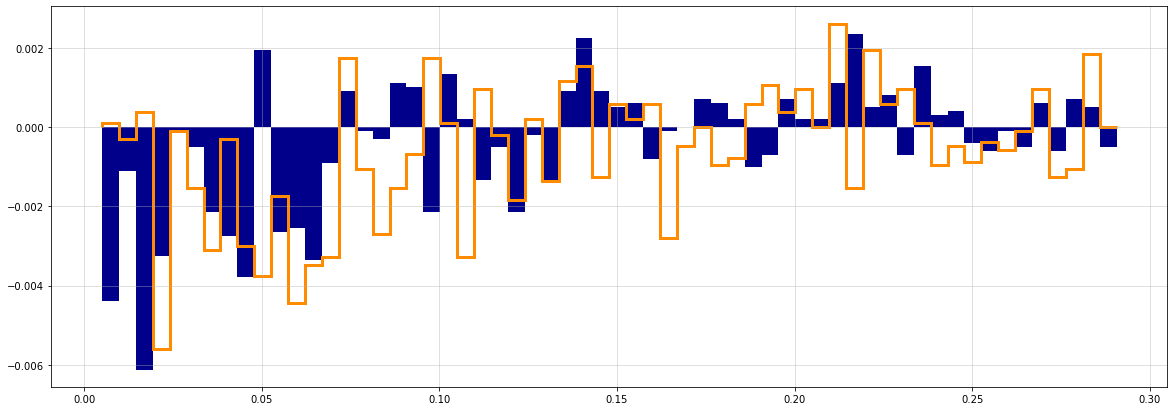

In [215]:
plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.stairs(adt, edges = ranges, fill = True, color = 'darkblue')
plt.stairs(bdt, edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

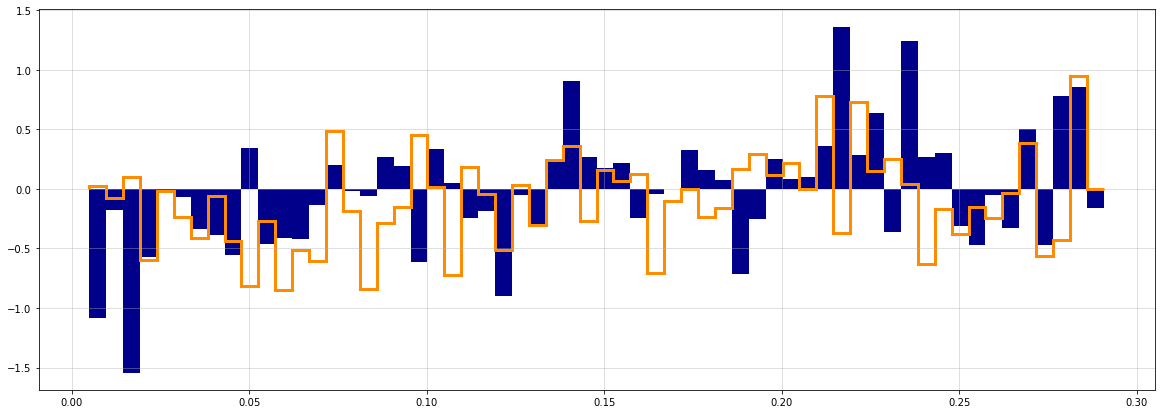

In [216]:
plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.stairs(azt, edges = ranges, fill = True, color = 'darkblue')
plt.stairs(bzt, edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

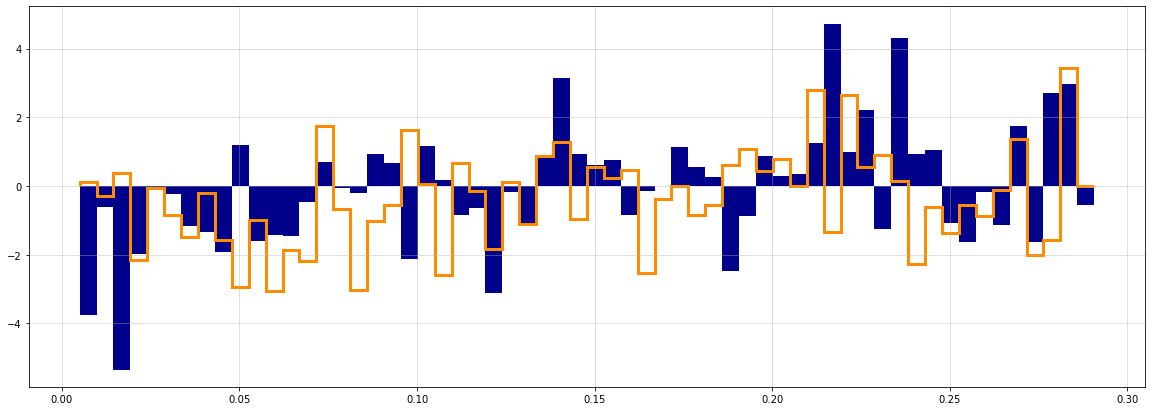

In [217]:
plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.stairs(att, edges = ranges, fill = True, color = 'darkblue')
plt.stairs(btt, edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

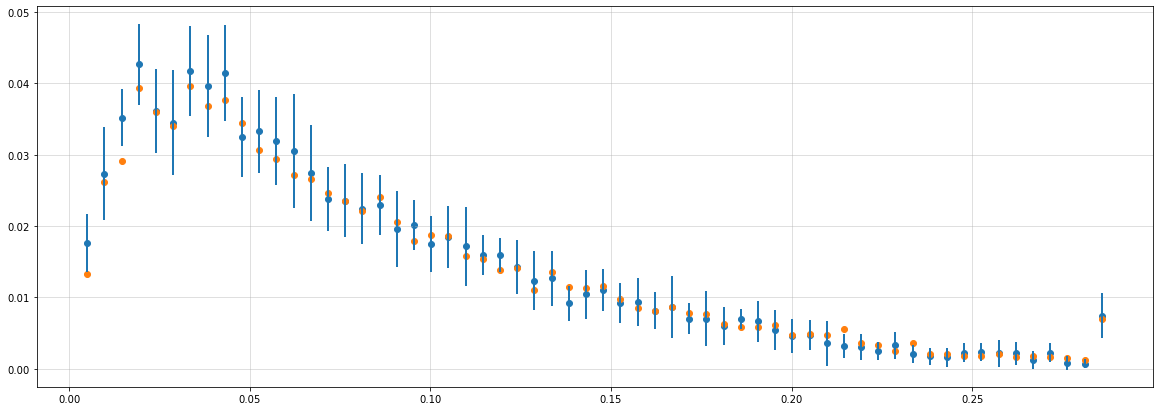

In [218]:
plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.scatter(ranges[:-1], afpofft)
plt.errorbar(ranges[:-1], afpofft, yerr = afpstdofft, linewidth = 0, elinewidth = 2)

plt.scatter(ranges[:-1], afpont)
#plt.errorbar(ranges[:-1], afpont, yerr = afpstdont, linewidth = 0, elinewidth = 2)

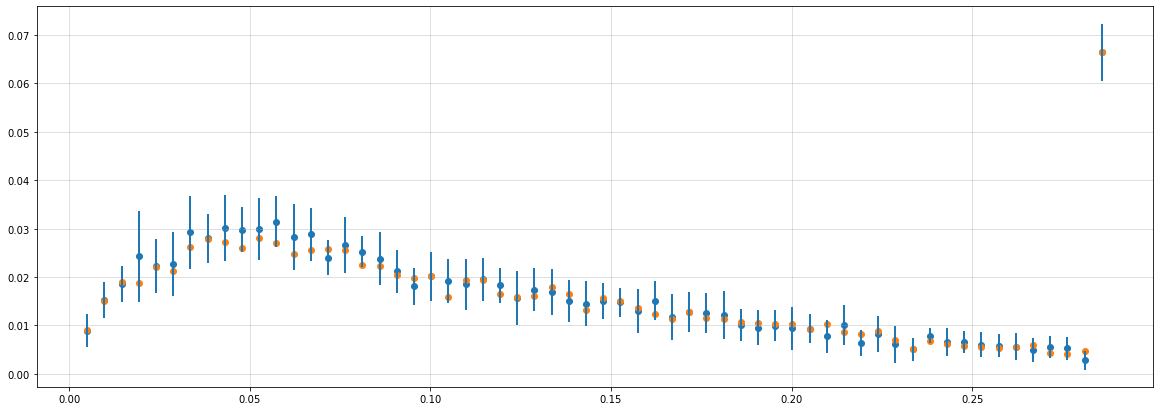

In [220]:
plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.scatter(ranges[:-1], bfpofft)
plt.errorbar(ranges[:-1], bfpofft, yerr = bfpstdofft, linewidth = 0, elinewidth = 2)

plt.scatter(ranges[:-1], bfpont)
#plt.errorbar(ranges[:-1], bfpont, yerr = bfpstdont, linewidth = 0, elinewidth = 2)

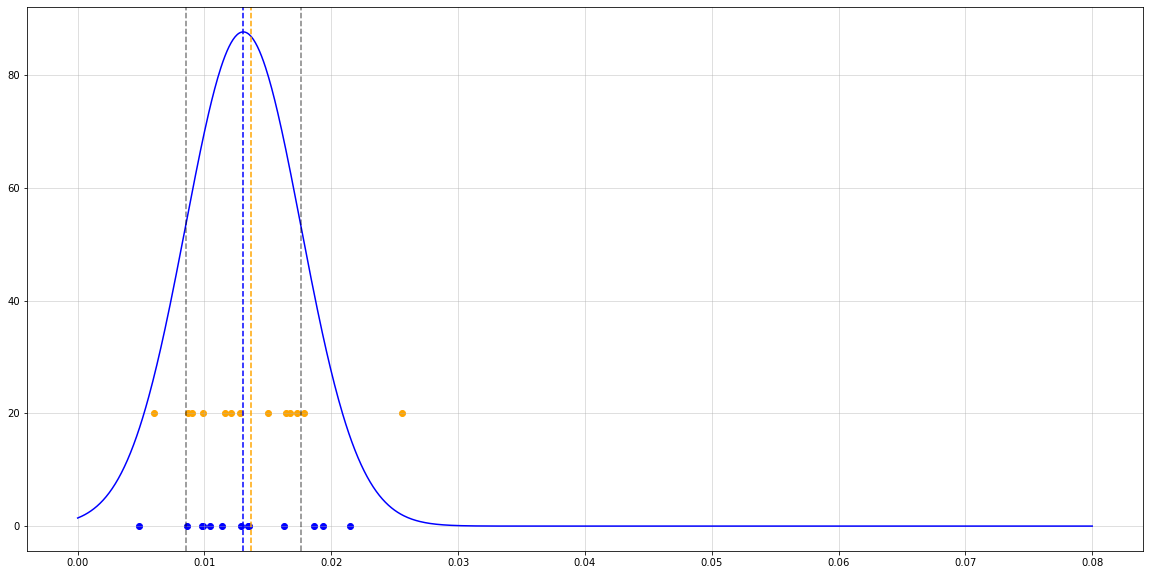

In [221]:
pos = 32

plt.figure(figsize = (20,10))
plt.grid(alpha = 0.5)
xl = np.linspace(0, 0.08, 1000)

plt.plot(xl, gaussian(xl,bfpstdofft[pos],bfpofft[pos]), c = 'blue')
plt.scatter([val[pos] for val in bpofft], [0]*len(broff), c = 'blue')
plt.axvline(bfpofft[pos], linestyle = '--', c = 'blue')
plt.axvline(bfpofft[pos]+bfpstdofft[pos], linestyle = '--', c = 'black', alpha = 0.5)
plt.axvline(bfpofft[pos]-bfpstdofft[pos], linestyle = '--', c = 'black', alpha = 0.5)

#plt.plot(xl, gaussian(xl,afpstdon[ch][pos],afpon[ch][pos]), c = 'orange')
plt.scatter([val[pos] for val in bpont], [20]*len(bron), c = 'orange')
plt.axvline(bfpont[pos], linestyle = '--', c = 'orange')

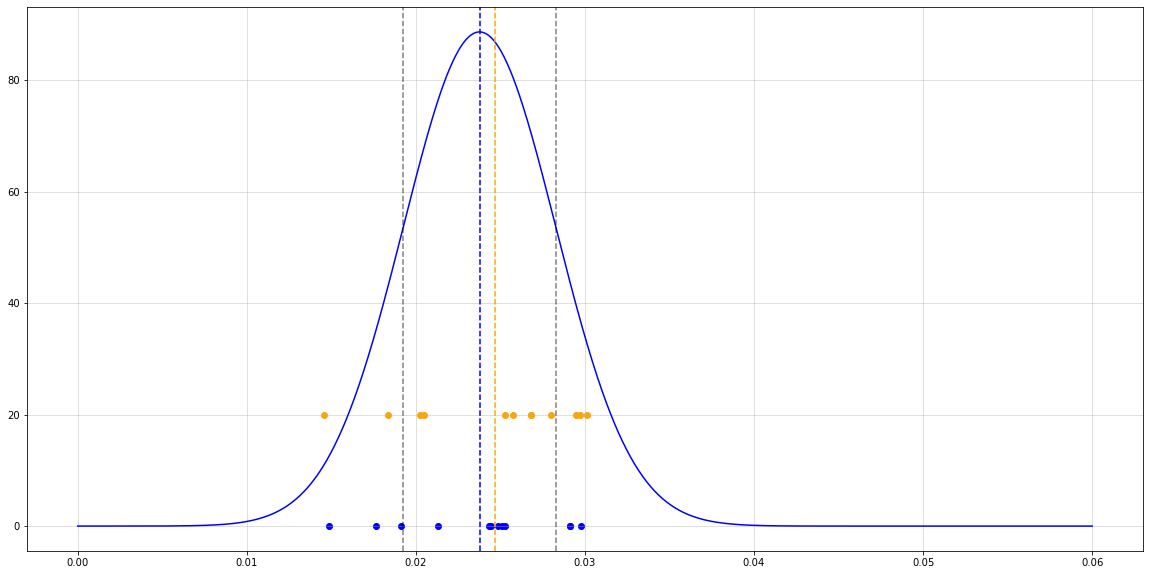

In [222]:
pos = 14

plt.figure(figsize = (20,10))
plt.grid(alpha = 0.5)
xl = np.linspace(0, 0.06, 1000)

plt.plot(xl, gaussian(xl,afpstdofft[pos],afpofft[pos]), c = 'blue')
plt.scatter([val[pos] for val in apofft], [0]*len(aroff), c = 'blue')
plt.axvline(afpofft[pos], linestyle = '--', c = 'blue')
plt.axvline(afpofft[pos]+afpstdofft[pos], linestyle = '--', c = 'black', alpha = 0.5)
plt.axvline(afpofft[pos]-afpstdofft[pos], linestyle = '--', c = 'black', alpha = 0.5)

#plt.plot(xl, gaussian(xl,afpstdon[ch][pos],afpon[ch][pos]), c = 'orange')
plt.scatter([val[pos] for val in apont], [20]*len(aron), c = 'orange')
plt.axvline(afpont[pos], linestyle = '--', c = 'orange')

In [147]:
(ra[0][0][0]-ra[1][0][0])/ad[0][0], (ra[0][0][1]-ra[1][0][1])/ad[0][1]

(270175.6472494977, 6251.022374732378)

In [149]:
ad[0][1], ra[0][0][1]-ra[1][0][1]

(-0.001391602571648047, -8.698938812107059)

In [173]:
len(afpoff[0])

20

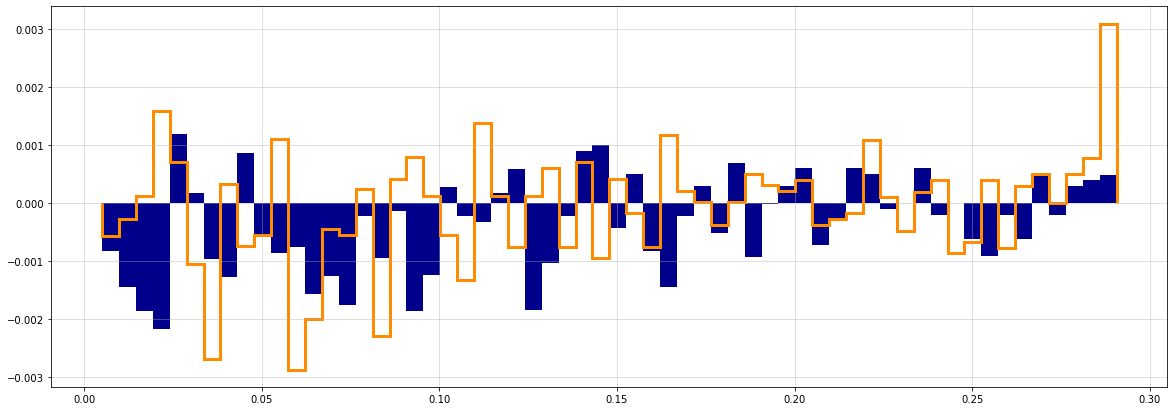

In [226]:
ch = 3

plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.stairs(ad[ch], edges = ranges, fill = True, color = 'darkblue')
plt.stairs(bd[ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

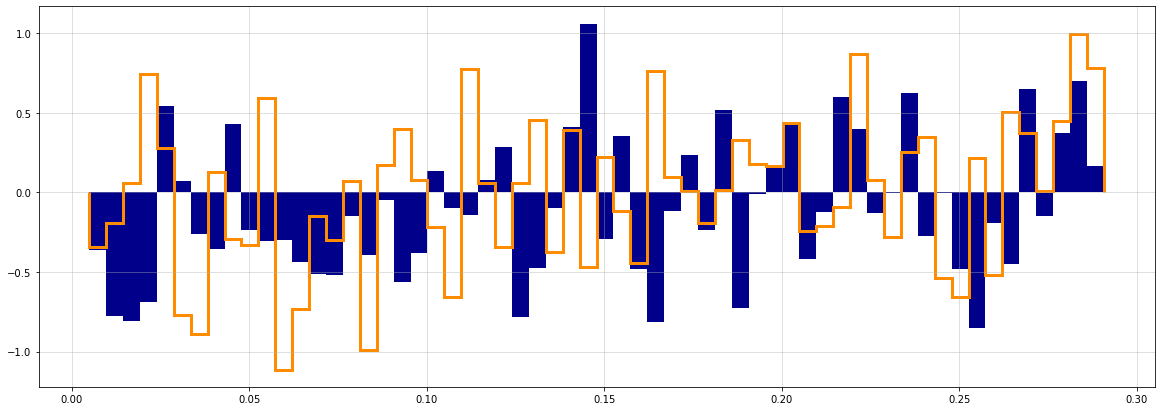

In [230]:
ch = 3

plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.stairs(az[ch], edges = ranges, fill = True, color = 'darkblue')
plt.stairs(bz[ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

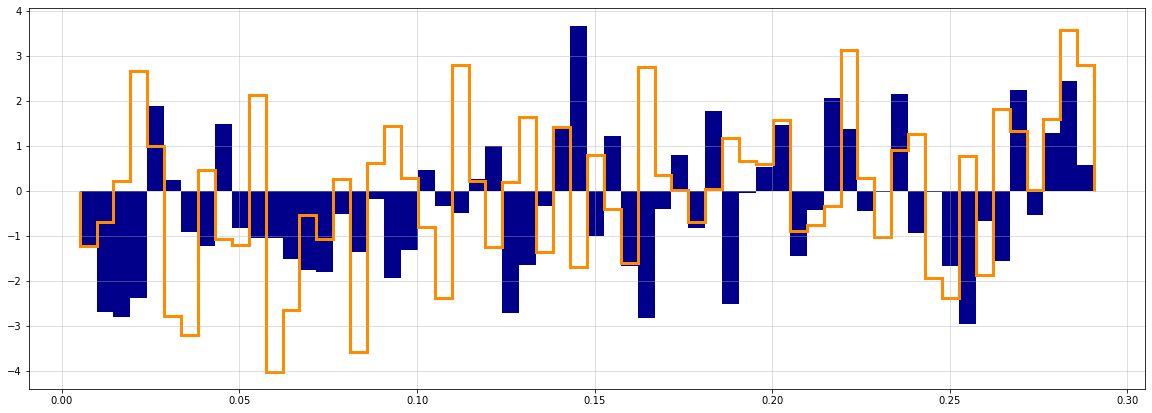

In [236]:
ch = 3

plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.stairs(at[ch], edges = ranges, fill = True, color = 'darkblue')
plt.stairs(bt[ch], edges = ranges, fill = False, color = 'darkorange', linewidth = 3)

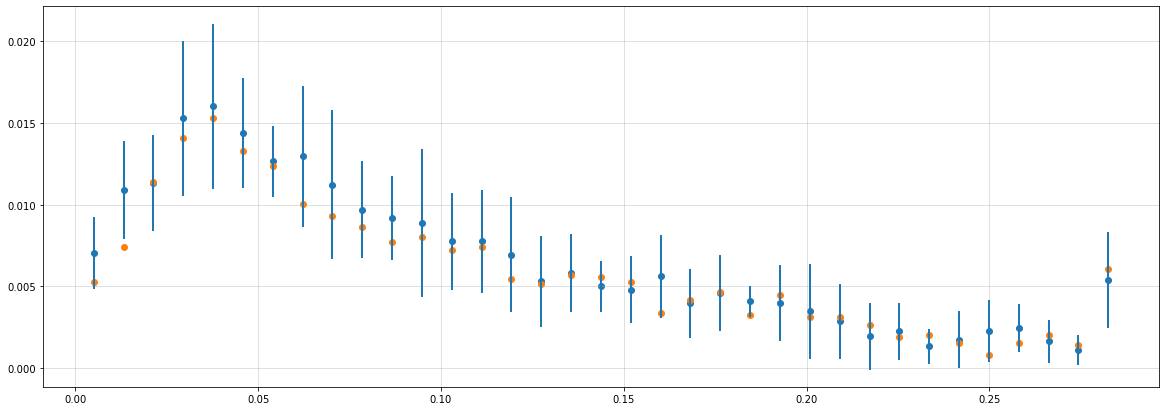

In [34]:
ch = 3

plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.scatter(ranges[:-1], afpoff[ch])
plt.errorbar(ranges[:-1], afpoff[ch], yerr = afpstdoff[ch], linewidth = 0, elinewidth = 2)

plt.scatter(ranges[:-1], afpon[ch])
#plt.errorbar(ranges[:-1], afpon[ch], yerr = afpstdon[ch], linewidth = 0, elinewidth = 2)

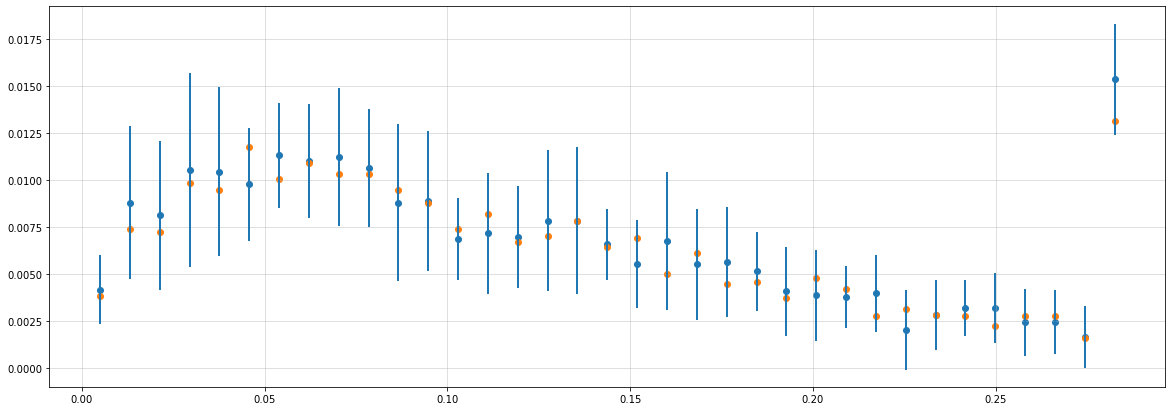

In [30]:
ch = 0

plt.figure(figsize = (20,7))
plt.grid(alpha = 0.5)

plt.scatter(ranges[:-1], bfpoff[ch])
plt.errorbar(ranges[:-1], bfpoff[ch], yerr = bfpstdoff[ch], linewidth = 0, elinewidth = 2)

plt.scatter(ranges[:-1], bfpon[ch])
#plt.errorbar(ranges[:-1], bfpon[ch], yerr = bfpstdon[ch], linewidth = 0, elinewidth = 2)

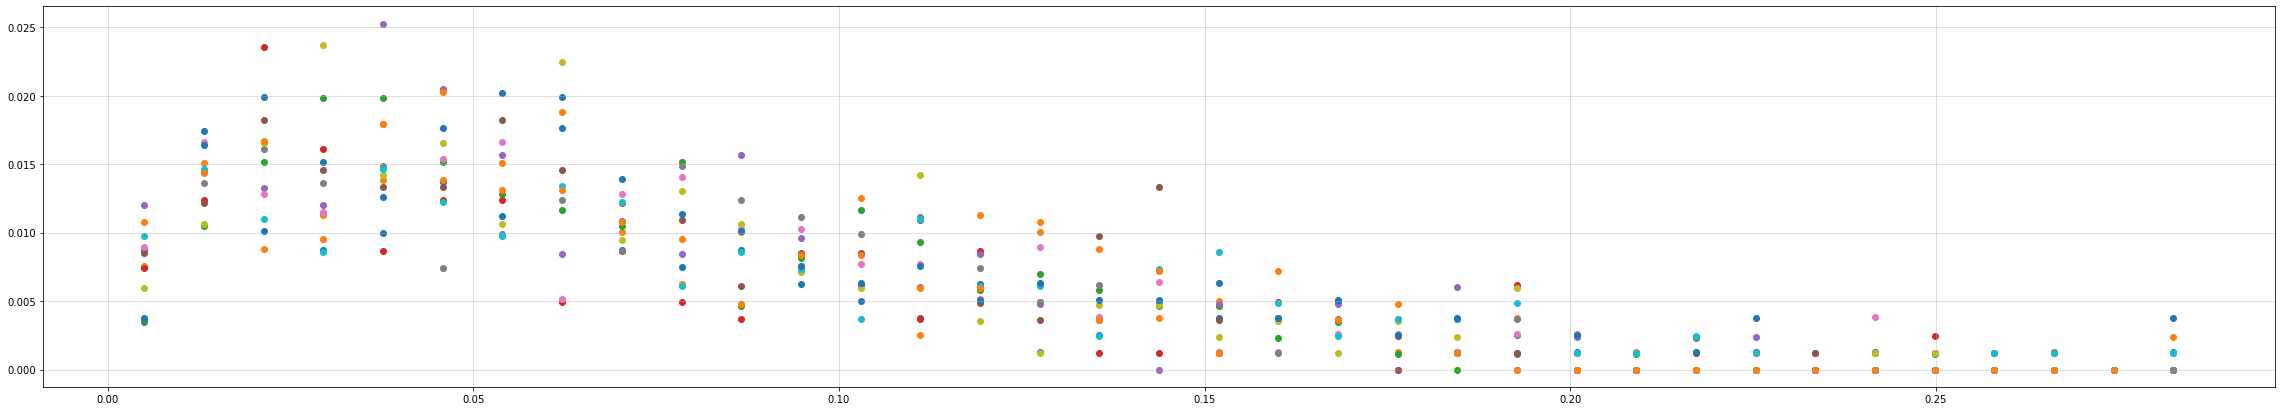

In [429]:
ch = 0

plt.figure(figsize = (40,7))
plt.grid(alpha = 0.5)

for i in range(len(aroff)):
    plt.scatter(ranges[:-1], apoff[i][ch])

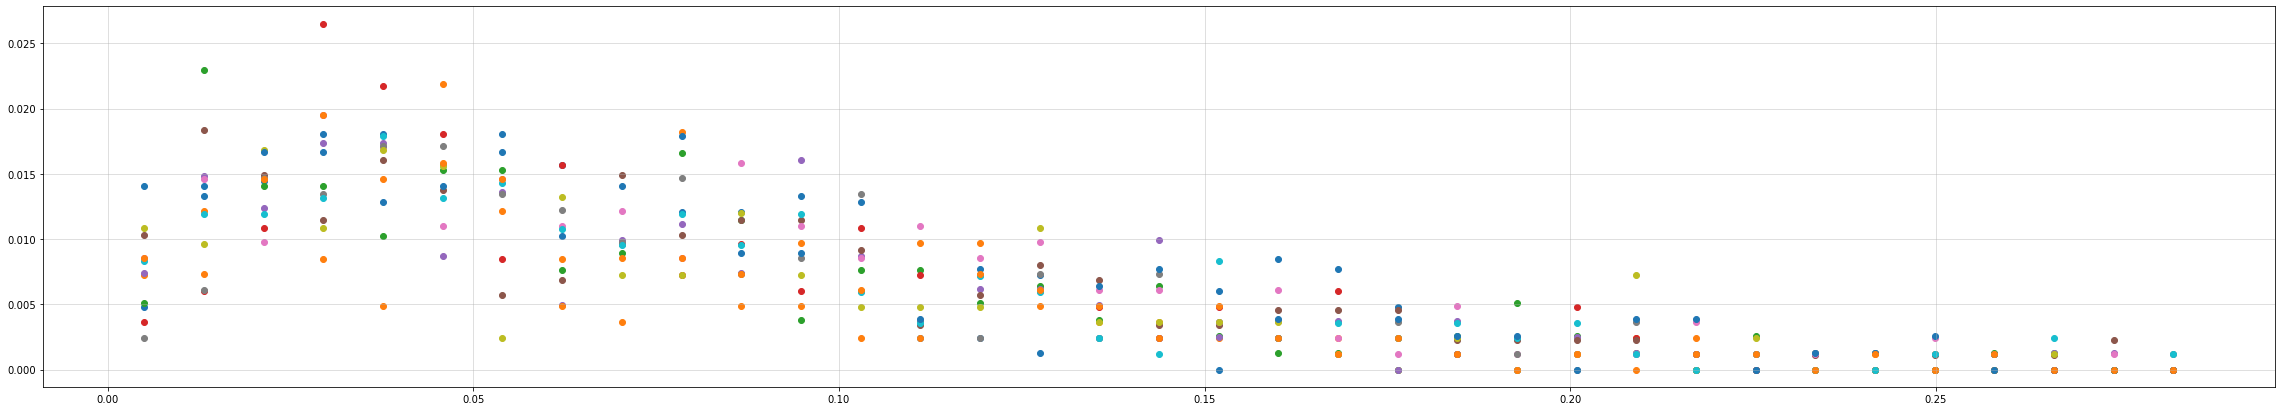

In [430]:
ch = 0

plt.figure(figsize = (40,7))
plt.grid(alpha = 0.5)

for i in range(len(aron)):
    plt.scatter(ranges[:-1], apon[i][ch])

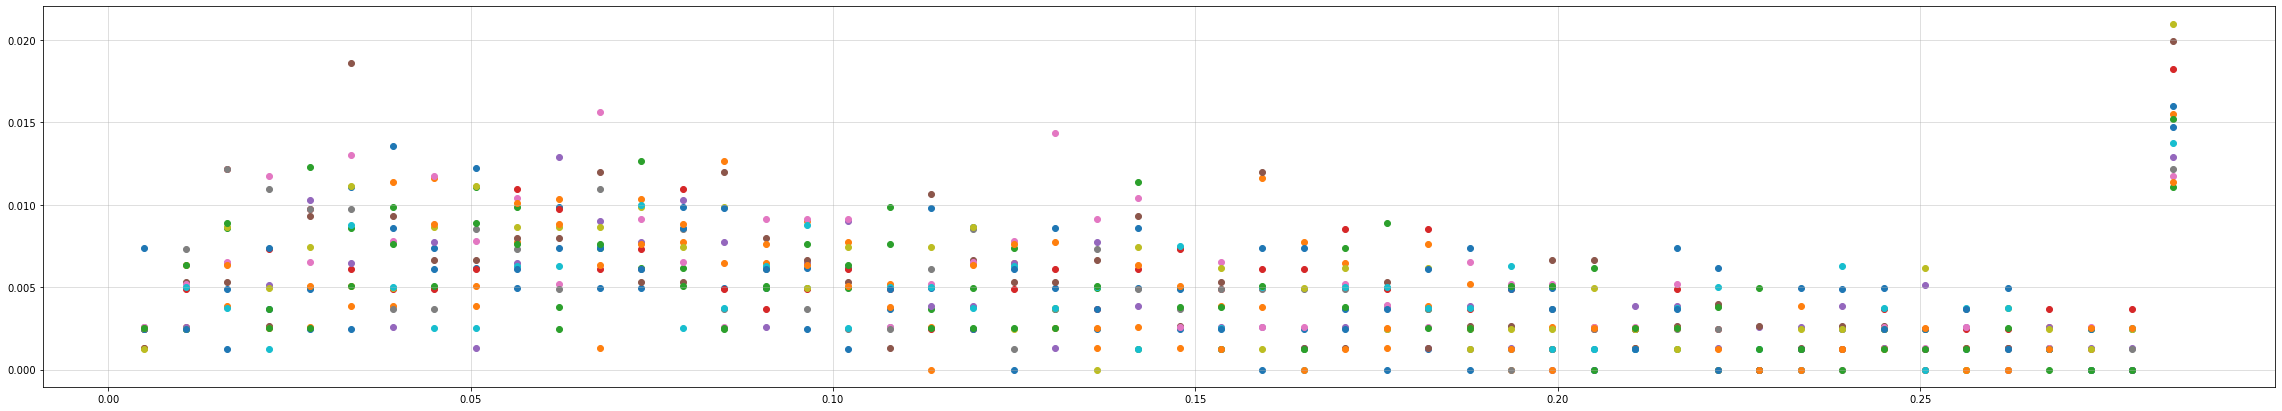

In [144]:
ch = 0

plt.figure(figsize = (40,7))
plt.grid(alpha = 0.5)

for i in range(len(broff)):
    plt.scatter(ranges[:-1], bpoff[i][ch])

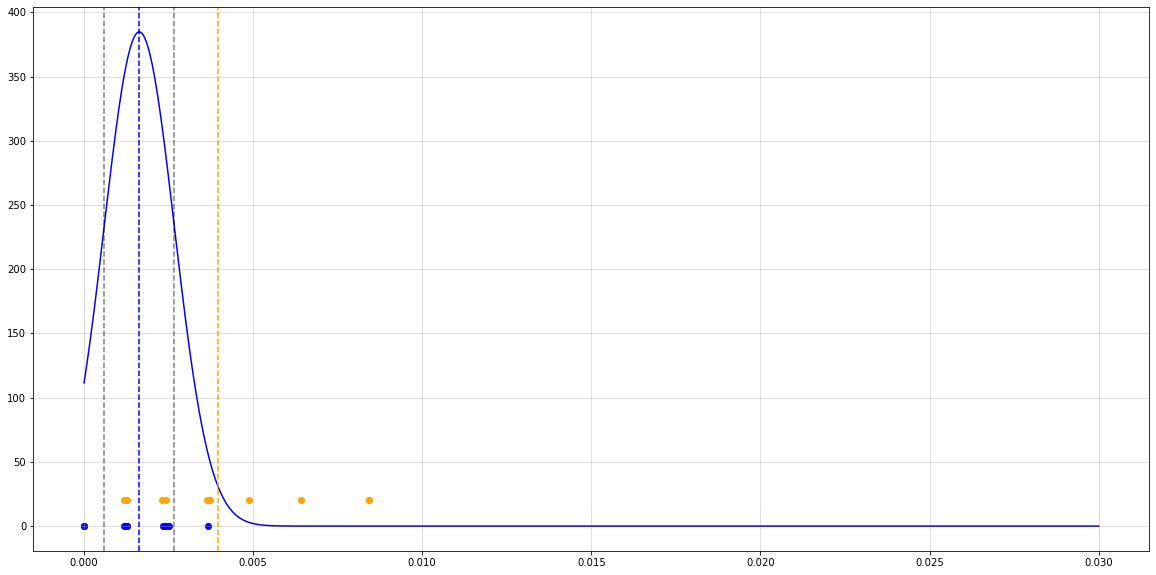

In [183]:
pos = 14
ch = 0

plt.figure(figsize = (20,10))
plt.grid(alpha = 0.5)
xl = np.linspace(0, 0.03, 1000)

plt.plot(xl, gaussian(xl,afpstdoff[ch][pos],afpoff[ch][pos]), c = 'blue')
plt.scatter([val[ch][pos] for val in apoff], [0]*len(aroff), c = 'blue')
plt.axvline(afpoff[ch][pos], linestyle = '--', c = 'blue')
plt.axvline(afpoff[ch][pos]+afpstdoff[ch][pos], linestyle = '--', c = 'black', alpha = 0.5)
plt.axvline(afpoff[ch][pos]-afpstdoff[ch][pos], linestyle = '--', c = 'black', alpha = 0.5)

#plt.plot(xl, gaussian(xl,afpstdon[ch][pos],afpon[ch][pos]), c = 'orange')
plt.scatter([val[ch][pos] for val in apon], [20]*len(aron), c = 'orange')
plt.axvline(afpon[ch][pos], linestyle = '--', c = 'orange')

In [264]:
ra[0][ch][pos], ra[1][ch][pos]

(101, 107.44018084345643)

In [260]:
sum(afpoff[0]), sum([len(val) if val != 'None' else 0 for val in list(aoff.time_ch1)])/aeoff

(0.2092082431923934, 0.20920824319239334)

In [261]:
sum(afpon[0]), sum([len(val) if val != 'None' else 0 for val in list(aon.time_ch1)])/aeon

(0.20609432382136822, 0.20609432382136814)

In [183]:
aeoff, sum(areoff)

(9803.629, 9803.629)

In [166]:
apoff[5][0][0]

0.003642907623148492

In [44]:
sum([len(val) for val in list(aoff.time_ch1) if val != 'None']), sum(ra[0][0])

(2051, 2051)

In [43]:
sum([len(val) for val in list(aon.time_ch1) if val != 'None']), sum(ra[1][0])

(2031, 2020.472289750556)

In [8]:
sum(rat[0])-sum(rat[1]), sum(rbt[0])-sum(rbt[1])

(284.7125458067803, 290.30920620139113)